##🚀drive mounting

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/My Drive/[2024-2025] AN2DL/Homework 2'
/content


##📚importing libraries

In [ ]:
# Set seed for reproducibility
seed = 42


# Import necessary libraries

import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


##📊Dataset

In previous explorations of the dataset we found some outliers and we decided to definitively remove them from out dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os

# **Change this to the correct path if needed!**
file_path = os.path.join('/content/drive/MyDrive/[2024-2025] AN2DL Homework 2', 'filtered_mars_for_students.npz')

data = np.load(file_path)
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Exception ignored in: <function NpzFile.__del__ at 0x7cffeb37d6c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 226, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 221, in close
OSError: [Errno 107] Transport endpoint is not connected


Training X shape: (2505, 64, 128)
Training y shape: (2505, 64, 128)
Test X shape: (10022, 64, 128)


In [ ]:
import gc
del data, training_set
gc.collect()

56798

###visual inspection

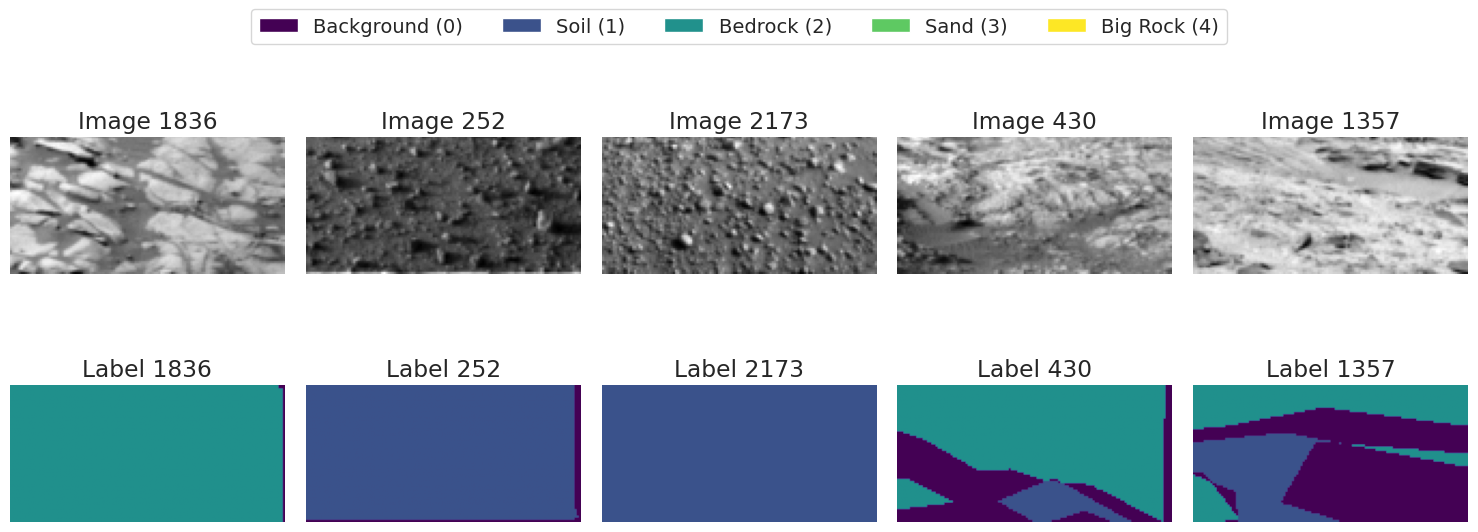

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Function to plot random images with labels
def plot_random_images_with_labels(images, labels, num=5):
    """
    Plots `num` random images with their respective label masks.

    Parameters:
        images (numpy.ndarray): Array of images.
        labels (numpy.ndarray): Array of label masks.
        num (int): Number of images to plot.
    """
    # Select `num` random indices
    random_indices = np.random.choice(len(images), num, replace=False)

    fig, axes = plt.subplots(2, num, figsize=(num * 3, 6))  # More compact figure

    for i, idx in enumerate(random_indices):
        # Show the image
        axes[0, i].imshow(images[idx], cmap='gray')
        axes[0, i].set_title(f"Image {idx}")
        axes[0, i].axis("off")

        # Show the mask with viridis
        axes[1, i].imshow(labels[idx], cmap='viridis', vmin=0, vmax=4)
        axes[1, i].set_title(f"Label {idx}")
        axes[1, i].axis("off")

    # Add a legend for the classes above the figure
    legend_elements = [
        Patch(facecolor=plt.cm.viridis(0 / 4), label='Background (0)'),
        Patch(facecolor=plt.cm.viridis(1 / 4), label='Soil (1)'),
        Patch(facecolor=plt.cm.viridis(2 / 4), label='Bedrock (2)'),
        Patch(facecolor=plt.cm.viridis(3 / 4), label='Sand (3)'),
        Patch(facecolor=plt.cm.viridis(4 / 4), label='Big Rock (4)')
    ]
    fig.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.05),
        ncol=5,
        fontsize='medium'
    )

    plt.tight_layout()
    plt.show()

# Plot 5 random images with labels
plot_random_images_with_labels(X_train, y_train, num=5)


###data processing

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Distribuzione delle classi: {0.0: 4988826, 1.0: 6957538, 2.0: 4776810, 3.0: 3770823, 4.0: 26963}


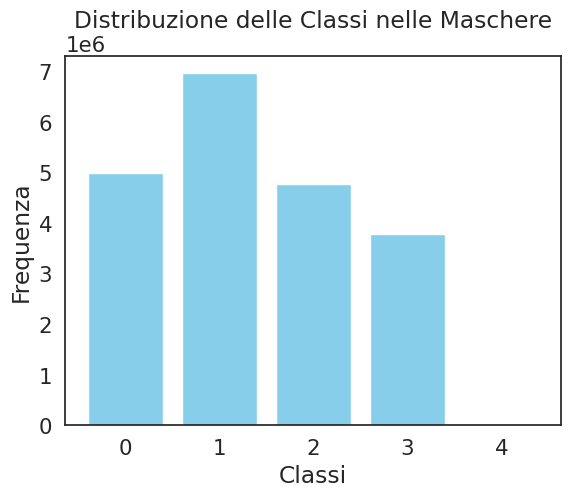

Numero di classi uniche nel dataset: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")


In [ ]:
from sklearn.model_selection import train_test_split

# First split: division between train and temp (which will become validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Second split: division between validation and test
X_val, X_test_tmp, y_val, y_test_tmp = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the size of the new splits
print(f"Number of images:")
print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test_tmp)}")


Number of images:
Train: 2004
Validation: 250
Test: 251


Distribuzione delle classi: {0.0: 3979893, 1.0: 5532162, 2.0: 3924593, 3.0: 2958791, 4.0: 21329}


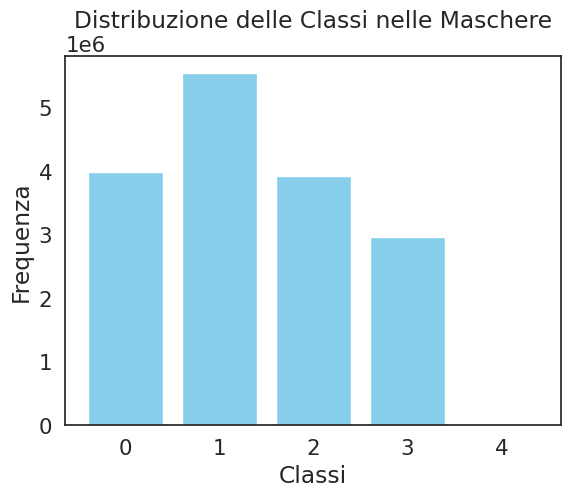

Numero di classi uniche nel dataset: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")

It is clear that there are classes that are highly represented, while others are significantly less represented

###preparing the dataset

We prepare the training dataset (applying geometric augmentations such as random flipping, rotation, and brightness/contrast adjustments using the Albumentations library), with the brightness and contrast modifications based on the dataset's statistical data (mean and standard deviation). The validation and test datasets are also created, and essential parameters like batch size, patience, number of epochs, and learning rate are set

In [ ]:
# Set batch size for training
BATCH_SIZE = 64

# Set learning rate for the optimiser
LEARNING_RATE = 1e-4

# Set early stopping patience threshold
PATIENCE = 30

# Set maximum number of training epochs
EPOCHS = 1000

In [ ]:
import numpy as np

# Add the channel to X_train and X_test
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel
X_test_tmp = np.expand_dims(X_test_tmp, axis=-1)  # Add a channel
X_val = np.expand_dims(X_val, axis=-1)

input_shape = X_train.shape[1:]  # The input shape (excluding batch dimension)
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")


Input shape: (64, 128, 1)
Number of classes: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute intensity statistics
def compute_intensity_statistics(images):
    # Converts each image to an array and flattens to analyze all pixels
    all_pixels = np.concatenate([img.reshape(-1) for img in images], axis=0)
    mean_intensity = np.mean(all_pixels)
    std_intensity = np.std(all_pixels)
    return mean_intensity, std_intensity

# Calculate the statistics of the training set
mean_intensity, std_intensity = compute_intensity_statistics(X_train)

print(f"Mean intensity: {mean_intensity}, Standard deviation of intensity: {std_intensity}")

# Augmentation pipeline (kept as in the original code)
augmentation_pipeline = A.Compose([
    # Resize (always necessary)
    A.Resize(height=64, width=128, p=1.0),

    # Horizontal flip (consistent with Mars soil, does not affect the semantics)
    A.HorizontalFlip(p=0.5),

    # Limited rotation (Mars soil might only require small orientation changes)
    A.Rotate(limit=10, p=0.5),  # Limited to avoid excessive distortions

    # RandomBrightnessContrast adapted based on mean and standard deviation
    A.RandomBrightnessContrast(
        brightness_limit=(mean_intensity - 0.1, mean_intensity + 0.1),  # Slight change only
        contrast_limit=(std_intensity * 0.2, std_intensity * 0.5),  # Controlled variability
        p=0.5
    ),
])

# Function to apply augmentation (using numpy)
def apply_augmentation(image, mask):
    image = image.numpy()  # Converts tensor to numpy
    mask = mask.numpy()    # Converts mask to numpy

    # Apply the augmentation pipeline
    augmented = augmentation_pipeline(image=image, mask=mask)

    # Return the images and masks as TensorFlow tensors
    return tf.convert_to_tensor(augmented['image'], dtype=tf.float32), tf.convert_to_tensor(augmented['mask'], dtype=tf.float32)

# Function to create the dataset
def make_dataset(X_train, y_train, batch_size, shuffle=True, augment=False, seed=None):
    # Add the fourth dimension to y_train if necessary
    if len(y_train.shape) == 3:
        y_train = tf.expand_dims(y_train, axis=-1)

    # Create the TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

    # Apply shuffling
    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size, seed=seed)

    # If augmentation is required, use tf.py_function
    if augment:
        def map_func(image, mask):
            # Use tf.py_function to perform augmentation
            image, mask = tf.py_function(apply_augmentation, [image, mask], [tf.float32, tf.float32])
            image.set_shape([None, None, 1])  # Set the shape for the image (approximate)
            mask.set_shape([None, None, 1])   # Set the shape for the mask (approximate)
            return image, mask

        # Use `map` to apply augmentation to the dataset
        dataset = dataset.map(map_func, num_parallel_calls=tf.data.AUTOTUNE)

    # Perform batching
    dataset = dataset.batch(batch_size, drop_remainder=False)

    # Optimize data loading
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

# Create the datasets
train_dataset = make_dataset(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    augment=True,
    seed=42
)

val_dataset = make_dataset(
    X_val, y_val,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataset = make_dataset(
    X_test_tmp, y_test_tmp,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("Datasets creati con successo!")

# Verify the shape of the data
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nForma input: {input_shape}")
    print("Forma immagini:", images.shape)
    print("Forma etichette:", labels.shape)
    print("Tipo etichette:", labels.dtype)
    break


Media intensità: 0.2380878869654233, Deviazione standard intensità: 0.10192000618762292
Datasets creati con successo!

Forma input: (64, 128, 1)
Forma immagini: (64, 64, 128, 1)
Forma etichette: (64, 64, 128, 1)
Tipo etichette: <dtype: 'float32'>


Visualizing examples from the training set:


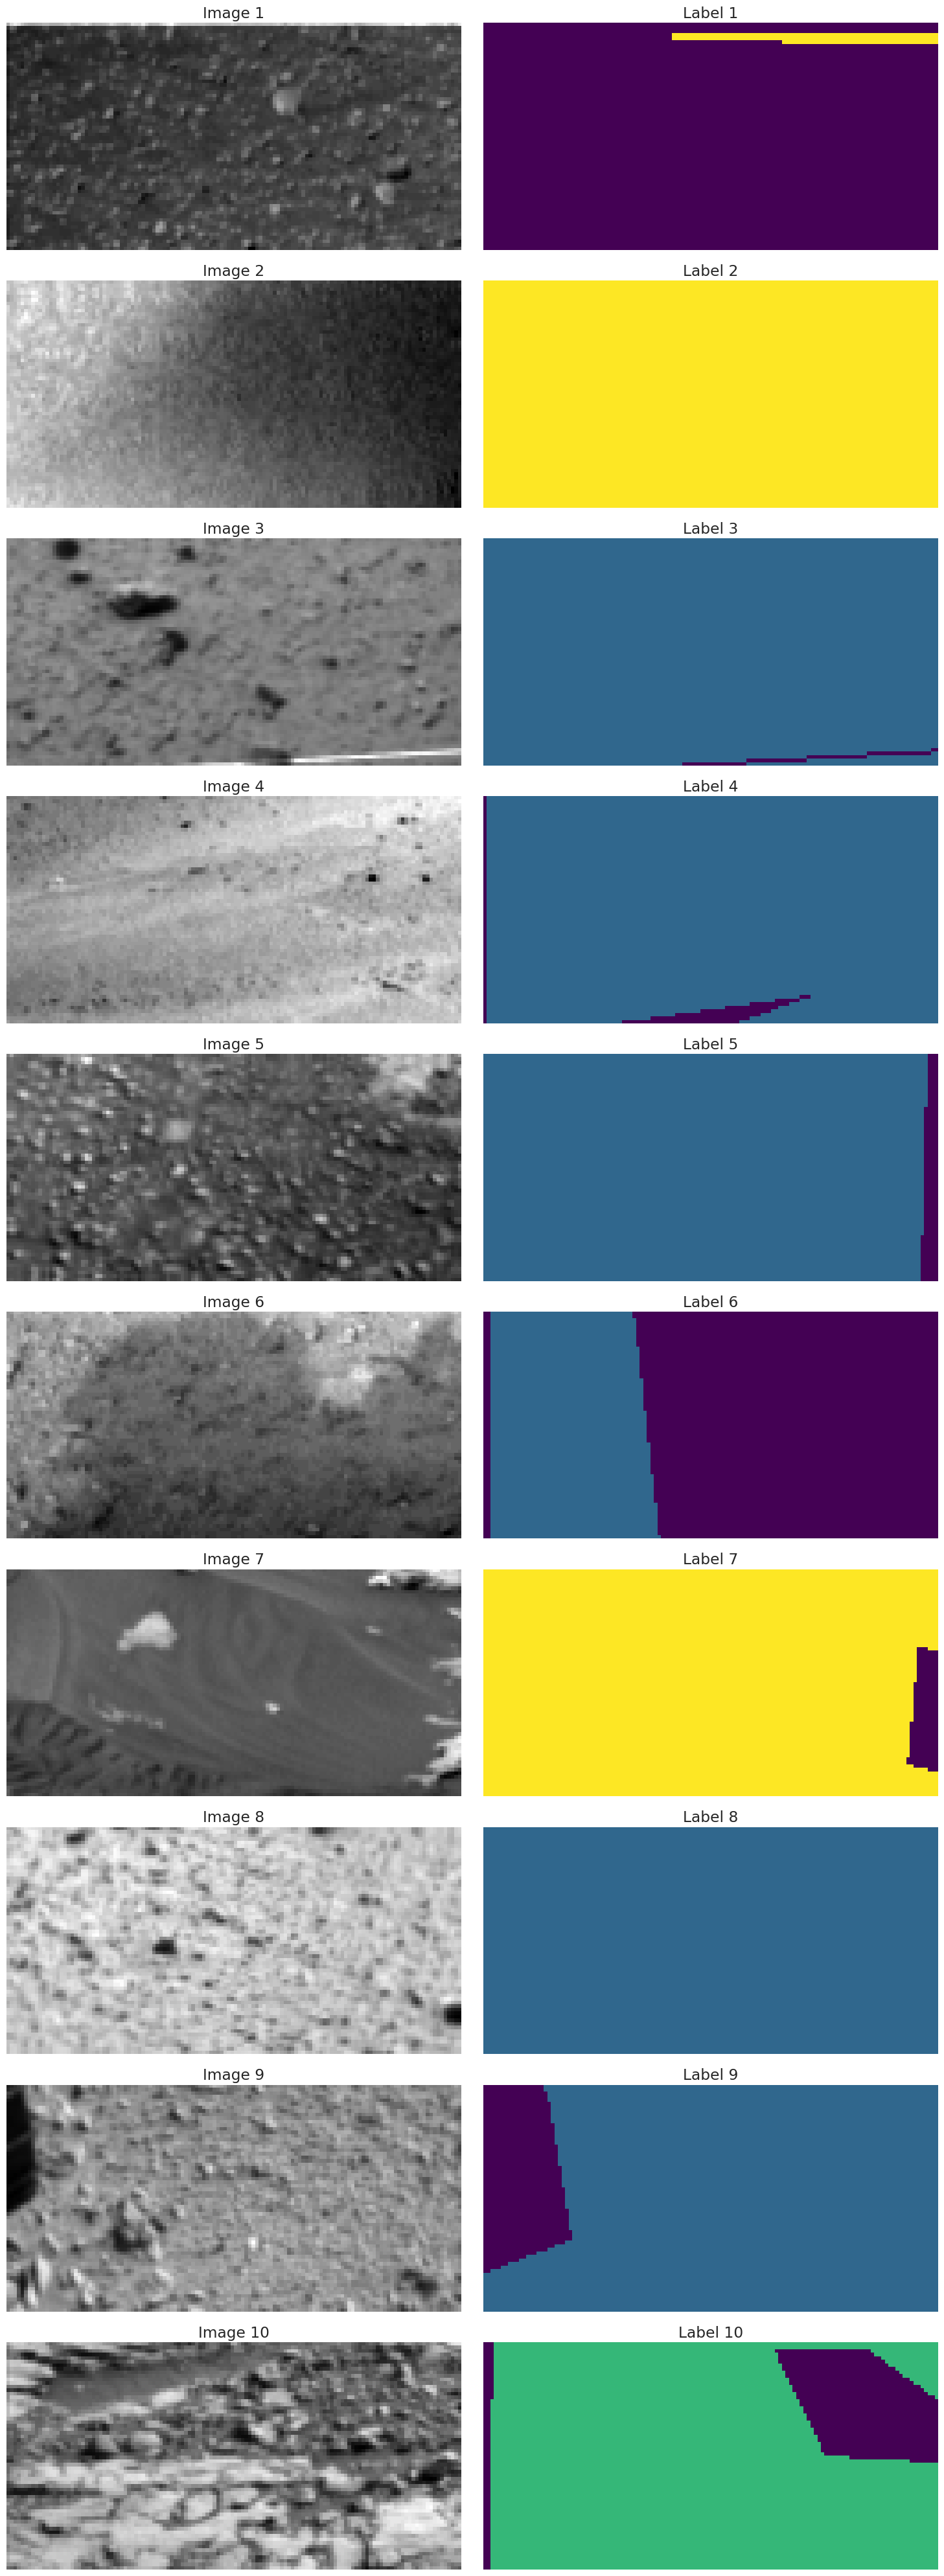

In [ ]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(dataset, num_samples=3):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(15, 4*num_samples))

    for images, labels in dataset.take(1):
        labels_np = labels.numpy()
        num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(min(num_samples, len(images))):
            # Plot original image
            plt.subplot(num_samples, 2, j*2 + 1)
            plt.imshow(tf.squeeze(images[j], axis=-1)*255, cmap='gray')
            plt.title(f'Image {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 2, j*2 + 2)
            colored_label = apply_colormap(labels_np[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

# Visualize examples from the training set
print("Visualizing examples from the training set:")
plot_sample_batch(train_dataset, num_samples=10)

Above are examples of the training dataset created

##💡Model

We define a U-Net model with two separate downsampling paths, one for global features and one for fine details (in different steps we used different numbers of filters to capture different levels of abstraction). Both paths consist of 3 downsampling blocks, followed by a bottleneck that uses dilated convolutions for larger receptive fields and Squeeze-and-Excitation for feature recalibration. The upsampling path applies gating mechanisms and attention blocks to enhance feature fusion between the encoder and decoder. The global and detail branches are processed independently and then fused before the final output layer, which uses softmax activation for multi-class predictions

In [ ]:
import tensorflow as tf
from keras import layers as tfkl

# Attention block (modifies the fusion between the decoder and encoder)
def attention_block(x, g, inter_channel):
    theta_x = tfkl.Conv2D(inter_channel, (1, 1), strides=(1, 1), padding='same')(x)
    phi_g = tfkl.Conv2D(inter_channel, (1, 1), strides=(1, 1), padding='same')(g)
    add_xg = tfkl.Add()([theta_x, phi_g])
    act_xg = tfkl.Activation('relu')(add_xg)
    psi = tfkl.Conv2D(1, (1, 1), strides=(1, 1), padding='same')(act_xg)
    sigmoid_psi = tfkl.Activation('sigmoid')(psi)
    return tfkl.Multiply()([x, sigmoid_psi])

# Squeeze-and-Excitation block
def squeeze_and_excitation(input_tensor, filters):
    se = tfkl.GlobalAveragePooling2D()(input_tensor)
    se = tfkl.Dense(filters // 16, activation='relu')(se)
    se = tfkl.Dense(filters, activation='sigmoid')(se)
    se = tfkl.Reshape((1, 1, filters))(se)
    return tfkl.Multiply()([input_tensor, se])

# Base U-Net block
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, name='', normalization_type='layer'):
    x = input_tensor
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)

        # Normalization based on the chosen type
        if normalization_type == 'batch':
            x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        elif normalization_type == 'layer':
            x = tfkl.LayerNormalization(name=name + 'ln' + str(i + 1))(x)
        elif normalization_type == 'group':
            x = tfkl.GroupNormalization(groups=8, name=name + 'gn' + str(i + 1))(x)

        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)
    return x

# Bottleneck block with Dilated convolutions and Squeeze-and-Excitation
def bottleneck_block(input_tensor, filters=256, normalization_type='layer'):
    x = dilated_conv_block(input_tensor, filters, dilation_rate=2, normalization_type=normalization_type)
    x = dilated_conv_block(x, filters, dilation_rate=4, normalization_type=normalization_type)
    x = squeeze_and_excitation(x, filters)
    return x

# Dilated convolution block function
def dilated_conv_block(input_tensor, filters, dilation_rate=2, normalization_type='layer'):
    x = tfkl.Conv2D(filters, kernel_size=3, dilation_rate=dilation_rate, padding='same')(input_tensor)

    # Select the type of normalization
    if normalization_type == 'batch':
        x = tfkl.BatchNormalization()(x)
    elif normalization_type == 'layer':
        x = tfkl.LayerNormalization()(x)
    elif normalization_type == 'group':
        x = tfkl.GroupNormalization(groups=8)(x)

    x = tfkl.ReLU()(x)
    return x

def gating_mechanism(x, skip, filters, activation='sigmoid'):
    # Concatenate x and skip (both must have the same spatial dimensions)
    combined = tfkl.Concatenate()([x, skip])

    # 1x1 convolution to reduce channels
    combined = tfkl.Conv2D(filters, (1, 1), padding='same')(combined)

    # Apply activation function
    gated = tfkl.Activation(activation)(combined)

    # Apply multiplication with the gate
    gated_output = tfkl.Multiply()([combined, gated])

    return gated_output


def get_unet_model(input_shape=(64, 128, 1), num_classes=5, seed=42):
    tf.random.set_seed(seed)
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling path for global features
    down_block_1_global = unet_block(input_layer, 32, name='down_block1_global_', normalization_type='batch')
    d1_global = tfkl.MaxPooling2D()(down_block_1_global)

    down_block_2_global = unet_block(d1_global, 64, name='down_block2_global_', normalization_type='batch')
    d2_global = tfkl.MaxPooling2D()(down_block_2_global)

    down_block_3_global = unet_block(d2_global, 128, name='down_block3_global_', normalization_type='batch')
    d3_global = tfkl.MaxPooling2D()(down_block_3_global)

    # Downsampling path for fine details
    down_block_1_detail = unet_block(input_layer, 32, name='down_block1_detail_', normalization_type='layer')
    d1_detail = tfkl.MaxPooling2D()(down_block_1_detail)

    down_block_2_detail = unet_block(d1_detail, 64, name='down_block2_detail_', normalization_type='layer')
    d2_detail = tfkl.MaxPooling2D()(down_block_2_detail)

    down_block_3_detail = unet_block(d2_detail, 128, name='down_block3_detail_', normalization_type='layer')
    d3_detail = tfkl.MaxPooling2D()(down_block_3_detail)

    # Bottleneck (Feature fusion with dilated convolutions and Squeeze-and-Excitation)
    bottleneck_global = dilated_conv_block(d3_global, filters=256, normalization_type='layer')
    bottleneck_global = squeeze_and_excitation(bottleneck_global, 256)
    bottleneck_global = tfkl.SpatialDropout2D(rate=0.4)(bottleneck_global)

    bottleneck_detail = dilated_conv_block(d3_detail, filters=256, normalization_type='layer')
    bottleneck_detail = squeeze_and_excitation(bottleneck_detail, 256)
    bottleneck_detail = tfkl.SpatialDropout2D(rate=0.4)(bottleneck_detail)

    # Upsampling path for global features
    u1_global = tfkl.UpSampling2D()(bottleneck_global)
    u1_global = gating_mechanism(u1_global, down_block_3_global, filters=128)  # Gating mechanism
    u1_global = attention_block(u1_global, down_block_3_global, inter_channel=128)  # Add attention
    u1_global = unet_block(u1_global, 128, name='up_block1_global_', normalization_type='group')


    u2_global = tfkl.UpSampling2D()(u1_global)
    u2_global = gating_mechanism(u2_global, down_block_2_global, filters=64)  # Gating mechanism
    u2_global = attention_block(u2_global, down_block_2_global, inter_channel=64)  # Add attention
    u2_global = unet_block(u2_global, 64, name='up_block2_global_', normalization_type='group')


    u3_global = tfkl.UpSampling2D()(u2_global)
    u3_global = gating_mechanism(u3_global, down_block_1_global, filters=32)  # Gating mechanism
    u3_global = attention_block(u3_global, down_block_1_global, inter_channel=32)  # Add attention
    u3_global = unet_block(u3_global, 32, name='up_block3_global_', normalization_type='group')

    # Upsampling path for fine details
    u1_detail = tfkl.UpSampling2D()(bottleneck_detail)
    u1_detail = gating_mechanism(u1_detail, down_block_3_detail, filters=128)  # Gating mechanism
    u1_detail = attention_block(u1_detail, down_block_3_detail, inter_channel=128)  # Add attention
    u1_detail = unet_block(u1_detail, 128, name='up_block1_detail_', normalization_type='group')

    u2_detail = tfkl.UpSampling2D()(u1_detail)
    u2_detail = gating_mechanism(u2_detail, down_block_2_detail, filters=64)  # Gating mechanism
    u2_detail = attention_block(u2_detail, down_block_2_detail, inter_channel=64)  # Add attention
    u2_detail = unet_block(u2_detail, 64, name='up_block2_detail_', normalization_type='group')

    u3_detail = tfkl.UpSampling2D()(u2_detail)
    u3_detail = gating_mechanism(u3_detail, down_block_1_detail, filters=32)  # Gating mechanism
    u3_detail = attention_block(u3_detail, down_block_1_detail, inter_channel=32)  # Add attention
    u3_detail = unet_block(u3_detail, 32, name='up_block3_detail_', normalization_type='group')

    # Fusion of global and detail branches
    u3_fused = tfkl.Concatenate()([u3_global, u3_detail])

    # Final dropout and Output Layer
    u3_fused = tfkl.SpatialDropout2D(rate=0.4)(u3_fused)
    output_layer = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', activation="softmax")(u3_fused)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='UNet_MultiScale_Gating')
    return model


In [ ]:
model = get_unet_model()

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
#tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

Model: "UNet_MultiScale_Gating"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_co… │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_co… │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_bn1 │ (None, 64, 128, 32)  │          128 │ down_block1_global… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ln1 │ (None, 64, 128, 32)  │           64 │ down_block1_detail… │    Y    │
│ (LayerNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_global… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_detail… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_co… │ (None, 64, 128, 32)  │        9,248 │ down_block1_global… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_co… │ (None, 64, 128, 32)  │        9,248 │ down_block1_detail… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_bn2 │ (None, 64, 128, 32)  │          128 │ down_block1_global… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ln2 │ (None, 64, 128, 32)  │           64 │ down_block1_detail… │    Y    │
│ (LayerNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_global… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_detail… │    -    │
│ (Activation)           │                      │              │                     │         │
├──────────────────────

 Total params: 2,177,835 (8.31 MB)

 Trainable params: 2,176,939 (8.30 MB)

 Non-trainable params: 896 (3.50 KB)

Above, you can see the structure of the created model and the number of parameters

We define the MIoU (Mean Intersection over Union) and the Viz Callback to monitor the model's performance during training. MIoU is used as a metric to evaluate the accuracy of pixel-wise segmentation, while the Viz Callback helps visualize the model's predictions in real-time, providing insights into the training process

In [ ]:
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)


In [ ]:
class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, sample_images, sample_labels, frequency=5):
        """
        Visualization callback to monitor predictions during training.

        Args:
        - sample_images: A list of two NumPy arrays, each representing an image.
        - sample_labels: A list of two NumPy arrays, each representing a segmentation mask.
        - frequency: Frequency in terms of epochs to display the results.
        """
        super().__init__()
        self.sample_images = sample_images  # List of two images
        self.sample_labels = sample_labels  # List of two masks
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        """
        Displays the predictions at the end of every `frequency` epochs.
        """
        if epoch % self.frequency == 0:
            num_samples = len(self.sample_images)

            # Create the colormap
            num_classes = self.model.output_shape[-1]  # Number of classes from the model
            colormap = create_segmentation_colormap(num_classes)

            plt.figure(figsize=(16, 4 * num_samples))  # Expands vertical size for more images

            for i in range(num_samples):
                image = tf.expand_dims(self.sample_images[i], 0)  # Adds batch dimension
                label = self.sample_labels[i]  # Associated label

                # Generate prediction
                pred = self.model.predict(image, verbose=0)
                y_pred = tf.math.argmax(pred, axis=-1)
                y_pred = y_pred.numpy()[0]  # Removes batch dimension

                # Input image
                plt.subplot(num_samples, 3, i * 3 + 1)
                plt.imshow(tf.squeeze(self.sample_images[i]), cmap='gray')
                plt.title(f"Input Image {i + 1}")
                plt.axis('off')

                # Ground truth
                plt.subplot(num_samples, 3, i * 3 + 2)
                colored_label = apply_colormap(label, colormap)
                plt.imshow(colored_label)
                plt.title(f"Ground Truth Mask {i + 1}")
                plt.axis('off')

                # Prediction
                plt.subplot(num_samples, 3, i * 3 + 3)
                colored_pred = apply_colormap(y_pred, colormap)
                plt.imshow(colored_pred)
                plt.title(f"Predicted Mask {i + 1}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close()


sample_images = [X_val[0], X_val[1]]
sample_labels = [y_val[0], y_val[1]]
viz_callback = VizCallback(sample_images, sample_labels, frequency=5)


In [ ]:
# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=PATIENCE,
    restore_best_weights=True
)


We define a custom loss function that combines Weighted Dice Loss and Focal Loss. This approach helps the model handle class imbalances by adjusting the focus on challenging examples and optimizing segmentation accuracy. The two losses are weighted with adjustable parameters to balance their contributions during training.

In [ ]:
import tensorflow as tf
import numpy as np

def combined_weighted_loss(y_true, y_pred, dice_alpha=0.7, focal_alpha=0.3, gamma=2.0):
    """
    Combines Weighted Dice Loss and Focal Loss adapted for the given problem.

    Parameters:
    - y_true: Tensor with true labels.
    - y_pred: Tensor with model predictions.
    - dice_alpha: Weight of the Weighted Dice Loss.
    - focal_alpha: Weight of the Focal Loss.
    - gamma: Exponent for Focal Loss.
    """
    # Class weights calculated from your data
    class_weights = np.array([0.18, 0.25, 0.22, 0.20, 0.15], dtype=np.float32)  # Example of normalized weights
    class_weights_tf = tf.constant(class_weights, dtype=tf.float32)

    # Weighted Dice Loss
    y_true_one_hot = tf.one_hot(tf.cast(y_true[..., 0], tf.int32), depth=y_pred.shape[-1])
    intersection = tf.reduce_sum(y_true_one_hot * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true_one_hot + y_pred, axis=[1, 2])
    dice_loss = 1.0 - tf.reduce_mean((2.0 * intersection + 1e-7) / (union + 1e-7))

    # Focal Loss
    y_pred_clipped = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
    true_prob = tf.reduce_sum(y_true_one_hot * y_pred_clipped, axis=-1)
    focal_weight = tf.pow(1.0 - true_prob, gamma)
    focal_loss = -tf.reduce_mean(focal_weight * tf.math.log(true_prob + 1e-7))

    # Weighting the two components
    combined_loss = dice_alpha * dice_loss + focal_alpha * focal_loss
    return combined_loss


In [ ]:
loss_fn = lambda y_true, y_pred: combined_weighted_loss(y_true, y_pred)

In [ ]:
# Compile the model

print("Compiling model...")
model.compile(
    loss=loss_fn,
    optimizer = tf.keras.optimizers.AdamW(
    learning_rate=LEARNING_RATE,
    weight_decay=1e-4),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])]
)
print("Model compiled!")

Compiling model...
Model compiled!


###training

We can train the model, using early stopping to prevent overfitting and reduce computational time, along with a learning rate reduction when the loss plateaus

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2607 - loss: 0.9990 - mean_iou: 0.1001   

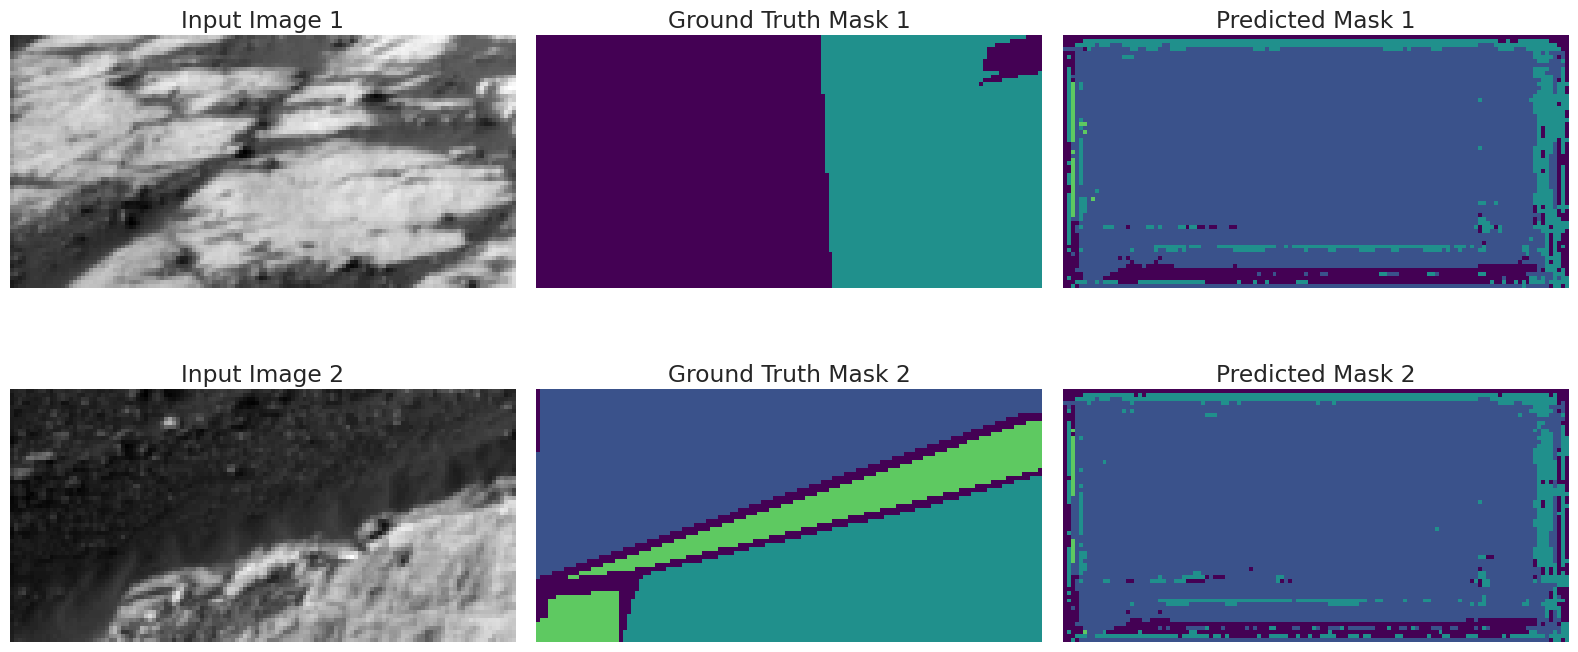

32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.2614 - loss: 0.9977 - mean_iou: 0.1006 - val_accuracy: 0.3216 - val_loss: 0.8820 - val_mean_iou: 0.0985 - learning_rate: 1.0000e-04
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 377ms/step - accuracy: 0.3291 - loss: 0.8983 - mean_iou: 0.1449 - val_accuracy: 0.3211 - val_loss: 0.8775 - val_mean_iou: 0.1029 - learning_rate: 1.0000e-04
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - accuracy: 0.3588 - loss: 0.8767 - mean_iou: 0.1599 - val_accuracy: 0.2621 - val_loss: 0.8794 - val_mean_iou: 0.0930 - learning_rate: 1.0000e-04
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 379ms/step - accuracy: 0.3731 - loss: 0.8642 - mean_iou: 0.1718 - val_accuracy: 0.2401 - val_loss: 0.8761 - val_mean_iou: 0.0634 - learning_rate: 1.0000e-04
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - accuracy: 0.4097 - loss: 0.8401 - mean_iou: 0.1908 - val_accuracy: 0.2340 - val_loss: 0.8978 - val_mean_iou: 0.0651 - learning_rate: 1.0000e-04
Epoch 6/10

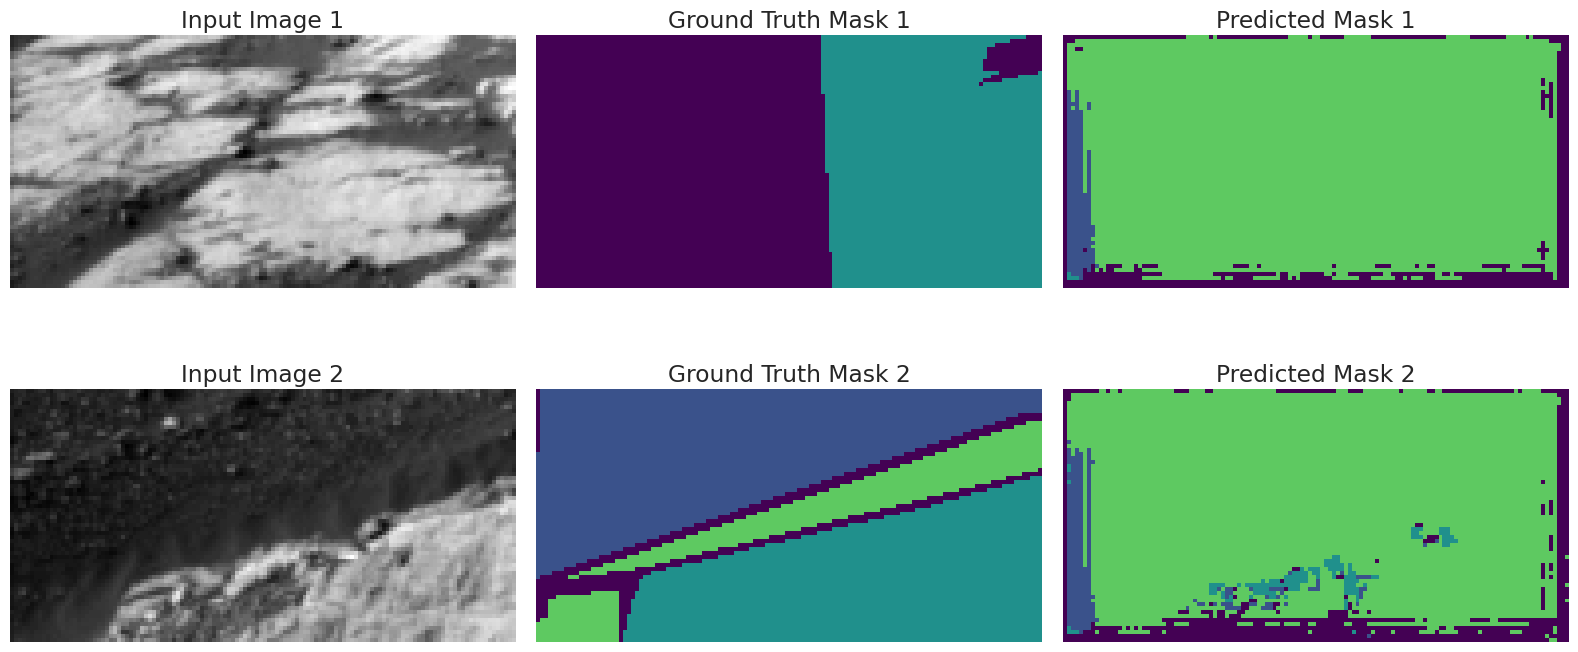

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.4293 - loss: 0.8306 - mean_iou: 0.1969 - val_accuracy: 0.2425 - val_loss: 0.8982 - val_mean_iou: 0.0648 - learning_rate: 1.0000e-04
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 394ms/step - accuracy: 0.4487 - loss: 0.8312 - mean_iou: 0.2061 - val_accuracy: 0.2636 - val_loss: 0.8726 - val_mean_iou: 0.0653 - learning_rate: 1.0000e-04
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - accuracy: 0.4676 - loss: 0.8142 - mean_iou: 0.2182 - val_accuracy: 0.2917 - val_loss: 0.8562 - val_mean_iou: 0.0732 - learning_rate: 1.0000e-04
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 378ms/step - accuracy: 0.4902 - loss: 0.8080 - mean_iou: 0.2389 - val_accuracy: 0.3088 - val_loss: 0.8546 - val_mean_iou: 0.0924 - learning_rate: 1.0000e-04
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - accuracy: 0.4990 - loss: 0.8024 - mean_iou: 0.2429 - val_accuracy: 0.2925 - val_loss: 0.8733 - val_mean_iou: 0.0805 - learning_rate: 1.0000e-04
Epoch 1

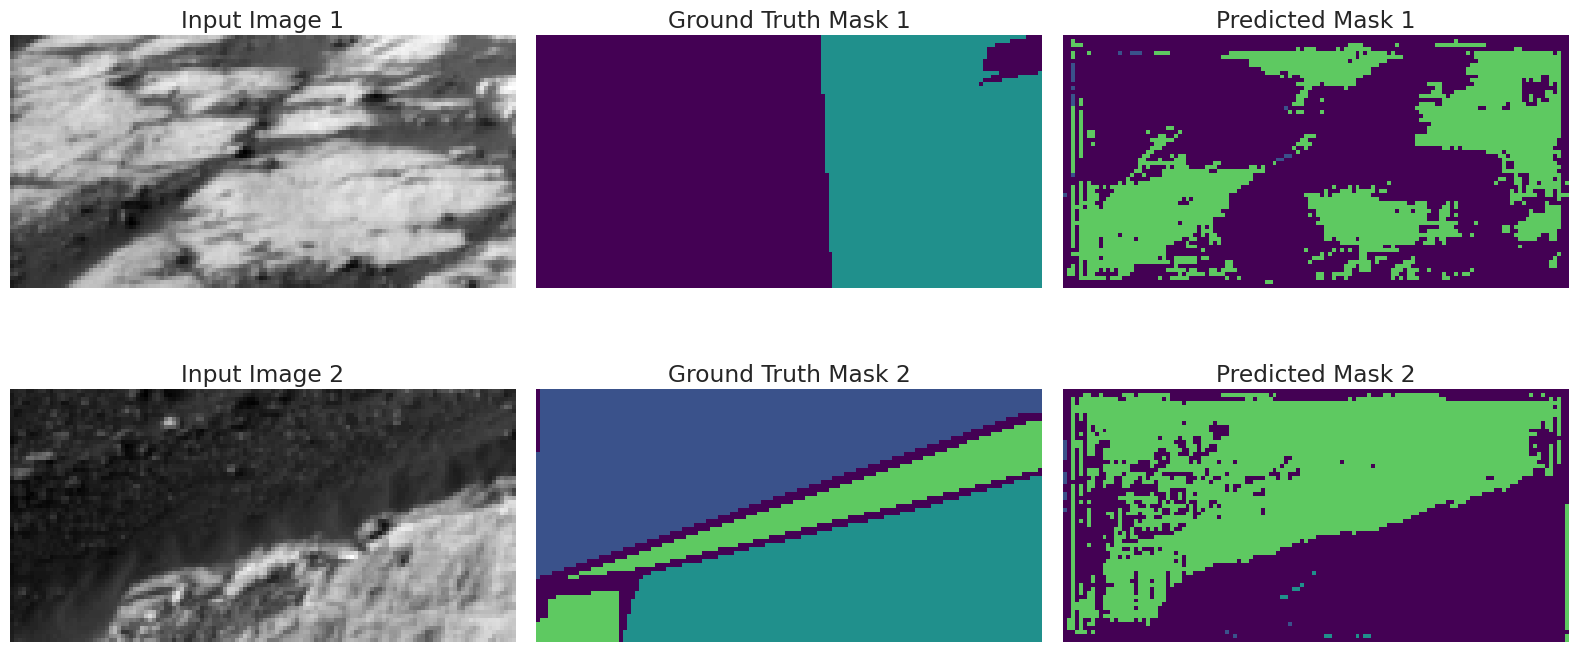

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 414ms/step - accuracy: 0.5163 - loss: 0.7944 - mean_iou: 0.2555 - val_accuracy: 0.3195 - val_loss: 0.8802 - val_mean_iou: 0.0820 - learning_rate: 1.0000e-04
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - accuracy: 0.5319 - loss: 0.7905 - mean_iou: 0.2684 - val_accuracy: 0.3179 - val_loss: 0.8792 - val_mean_iou: 0.0967 - learning_rate: 1.0000e-04
Epoch 13/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.5468 - loss: 0.7807 - mean_iou: 0.2751 - val_accuracy: 0.3706 - val_loss: 0.8613 - val_mean_iou: 0.1393 - learning_rate: 1.0000e-04
Epoch 14/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step - accuracy: 0.5787 - loss: 0.7706 - mean_iou: 0.3059 - val_accuracy: 0.4212 - val_loss: 0.8413 - val_mean_iou: 0.1743 - learning_rate: 1.0000e-04
Epoch 15/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.5688 - loss: 0.7717 - mean_iou: 0.2952 - val_accuracy: 0.5077 - val_loss: 0.7902 - val_mean_iou: 0.2282 - learning_rate: 1.0000e-04
Epoc

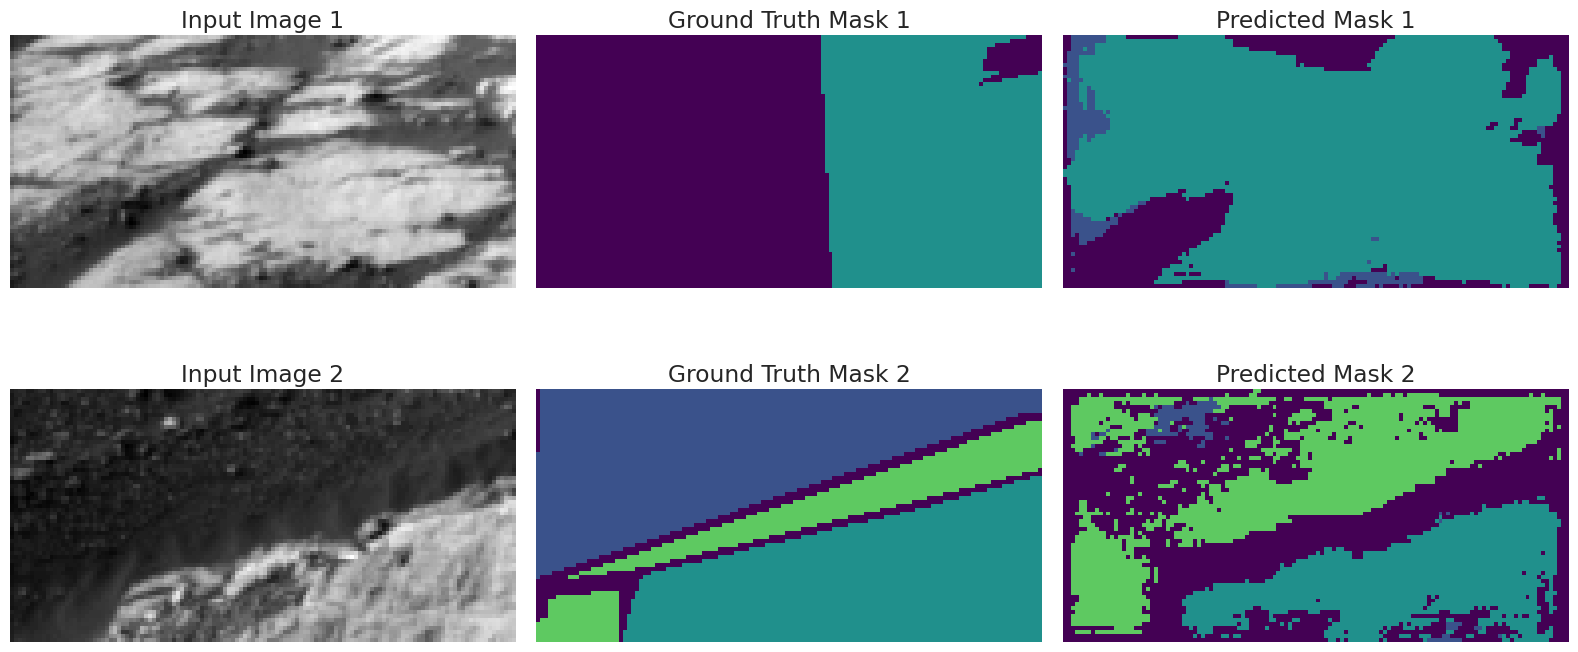

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 452ms/step - accuracy: 0.6057 - loss: 0.7571 - mean_iou: 0.3281 - val_accuracy: 0.5698 - val_loss: 0.7706 - val_mean_iou: 0.2872 - learning_rate: 1.0000e-04
Epoch 17/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.6124 - loss: 0.7541 - mean_iou: 0.3258 - val_accuracy: 0.5619 - val_loss: 0.7650 - val_mean_iou: 0.2745 - learning_rate: 1.0000e-04
Epoch 18/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 395ms/step - accuracy: 0.6185 - loss: 0.7459 - mean_iou: 0.3381 - val_accuracy: 0.6230 - val_loss: 0.7319 - val_mean_iou: 0.3220 - learning_rate: 1.0000e-04
Epoch 19/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.6117 - loss: 0.7501 - mean_iou: 0.3279 - val_accuracy: 0.6501 - val_loss: 0.7175 - val_mean_iou: 0.3499 - learning_rate: 1.0000e-04
Epoch 20/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.6235 - loss: 0.7477 - mean_iou: 0.3398 - val_accuracy: 0.6373 - val_loss: 0.7211 - val_mean_iou: 0.3417 - learning_rate: 1.0000e-04
Epoc

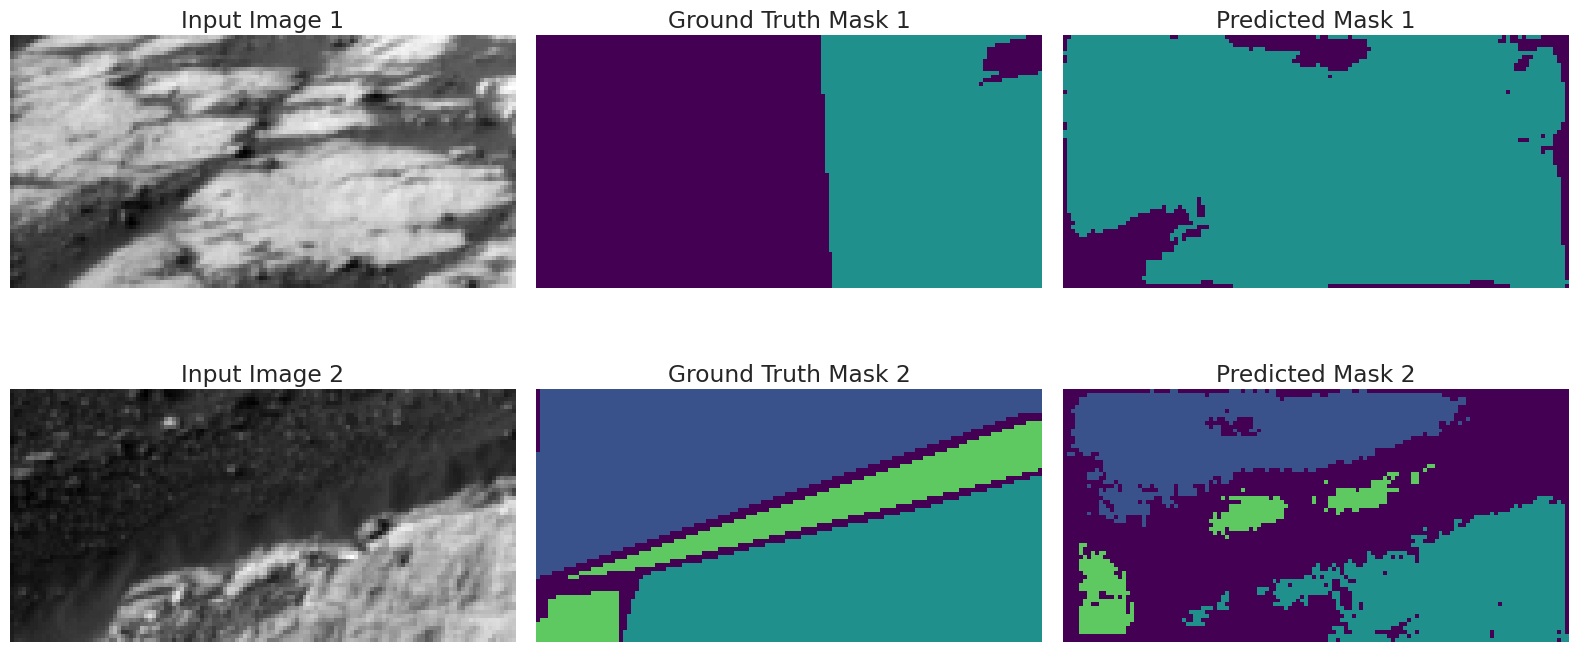

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - accuracy: 0.6369 - loss: 0.7412 - mean_iou: 0.3545 - val_accuracy: 0.6648 - val_loss: 0.7091 - val_mean_iou: 0.3660 - learning_rate: 1.0000e-04
Epoch 22/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.6384 - loss: 0.7390 - mean_iou: 0.3514 - val_accuracy: 0.6756 - val_loss: 0.7027 - val_mean_iou: 0.3806 - learning_rate: 1.0000e-04
Epoch 23/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - accuracy: 0.6506 - loss: 0.7318 - mean_iou: 0.3646 - val_accuracy: 0.6669 - val_loss: 0.7088 - val_mean_iou: 0.3670 - learning_rate: 1.0000e-04
Epoch 24/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.6598 - loss: 0.7291 - mean_iou: 0.3736 - val_accuracy: 0.6881 - val_loss: 0.6970 - val_mean_iou: 0.3992 - learning_rate: 1.0000e-04
Epoch 25/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step - accuracy: 0.6560 - loss: 0.7257 - mean_iou: 0.3733 - val_accuracy: 0.7104 - val_loss: 0.6848 - val_mean_iou: 0.4129 - learning_rate: 1.0000e-04
Epoc

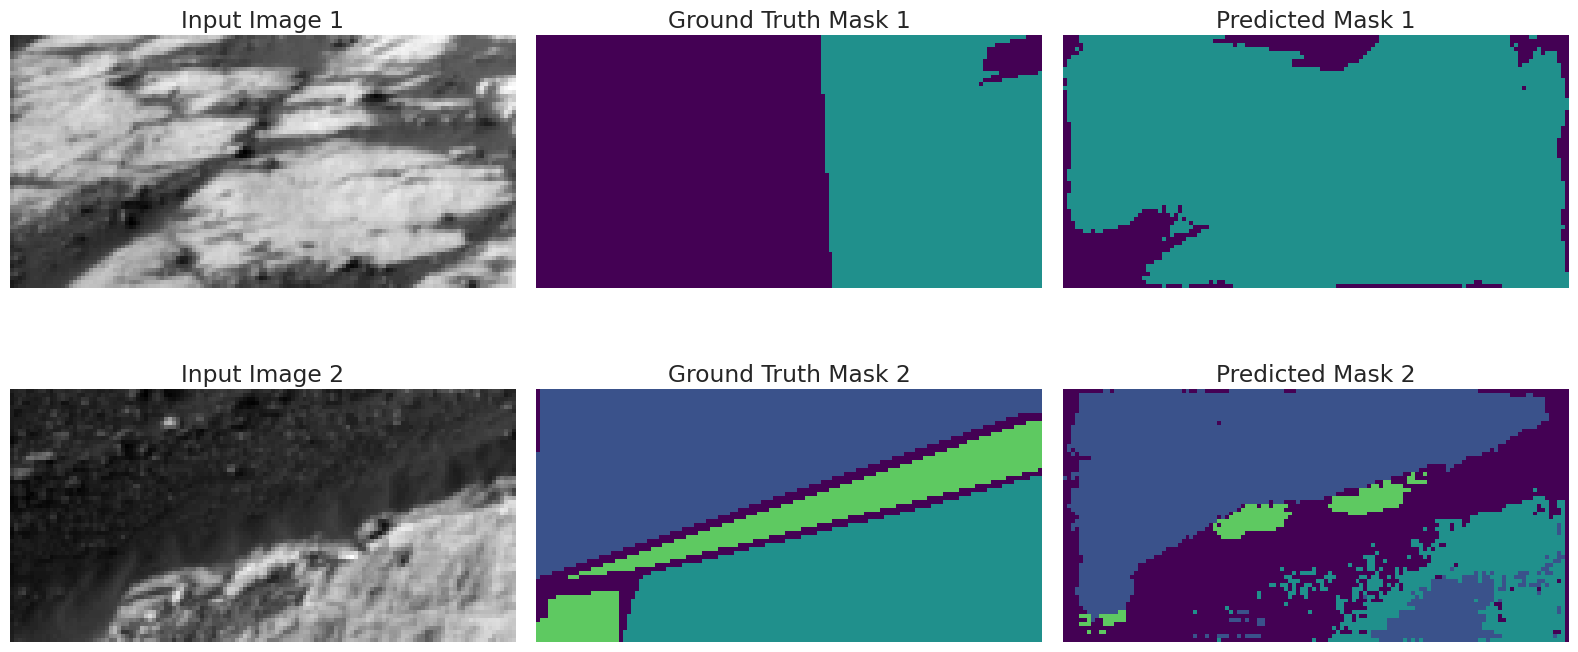

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 423ms/step - accuracy: 0.6657 - loss: 0.7248 - mean_iou: 0.3764 - val_accuracy: 0.6646 - val_loss: 0.7058 - val_mean_iou: 0.3587 - learning_rate: 1.0000e-04
Epoch 27/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 385ms/step - accuracy: 0.6567 - loss: 0.7275 - mean_iou: 0.3699 - val_accuracy: 0.6722 - val_loss: 0.7059 - val_mean_iou: 0.3674 - learning_rate: 1.0000e-04
Epoch 28/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.6638 - loss: 0.7214 - mean_iou: 0.3741 - val_accuracy: 0.6670 - val_loss: 0.7077 - val_mean_iou: 0.3723 - learning_rate: 1.0000e-04
Epoch 29/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 0.6680 - loss: 0.7184 - mean_iou: 0.3828 - val_accuracy: 0.6824 - val_loss: 0.6984 - val_mean_iou: 0.3888 - learning_rate: 1.0000e-04
Epoch 30/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - accuracy: 0.6649 - loss: 0.7251 - mean_iou: 0.3765 - val_accuracy: 0.6967 - val_loss: 0.6911 - val_mean_iou: 0.3946 - learning_rate: 1.0000e-04
Epoc

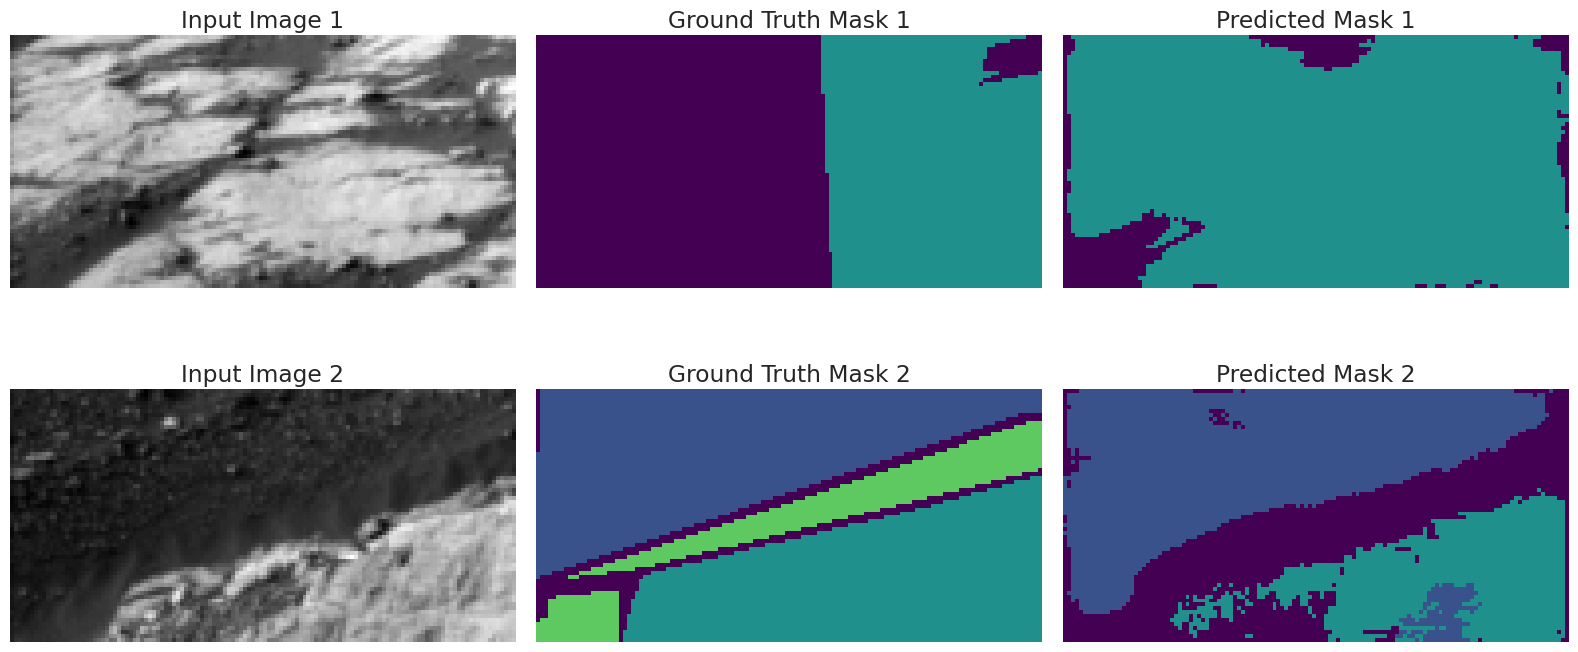

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 0.6785 - loss: 0.7132 - mean_iou: 0.3942 - val_accuracy: 0.7023 - val_loss: 0.6903 - val_mean_iou: 0.4032 - learning_rate: 1.0000e-04
Epoch 32/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - accuracy: 0.6769 - loss: 0.7156 - mean_iou: 0.3895 - val_accuracy: 0.6951 - val_loss: 0.6907 - val_mean_iou: 0.3982 - learning_rate: 1.0000e-04
Epoch 33/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.6818 - loss: 0.7101 - mean_iou: 0.3986 - val_accuracy: 0.6836 - val_loss: 0.6936 - val_mean_iou: 0.3769 - learning_rate: 1.0000e-04
Epoch 34/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 0.6829 - loss: 0.7107 - mean_iou: 0.3856 - val_accuracy: 0.7132 - val_loss: 0.6822 - val_mean_iou: 0.4132 - learning_rate: 1.0000e-04
Epoch 35/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - accuracy: 0.6889 - loss: 0.7067 - mean_iou: 0.4032 - val_accuracy: 0.7092 - val_loss: 0.6808 - val_mean_iou: 0.4074 - learning_rate: 1.0000e-04
Epoc

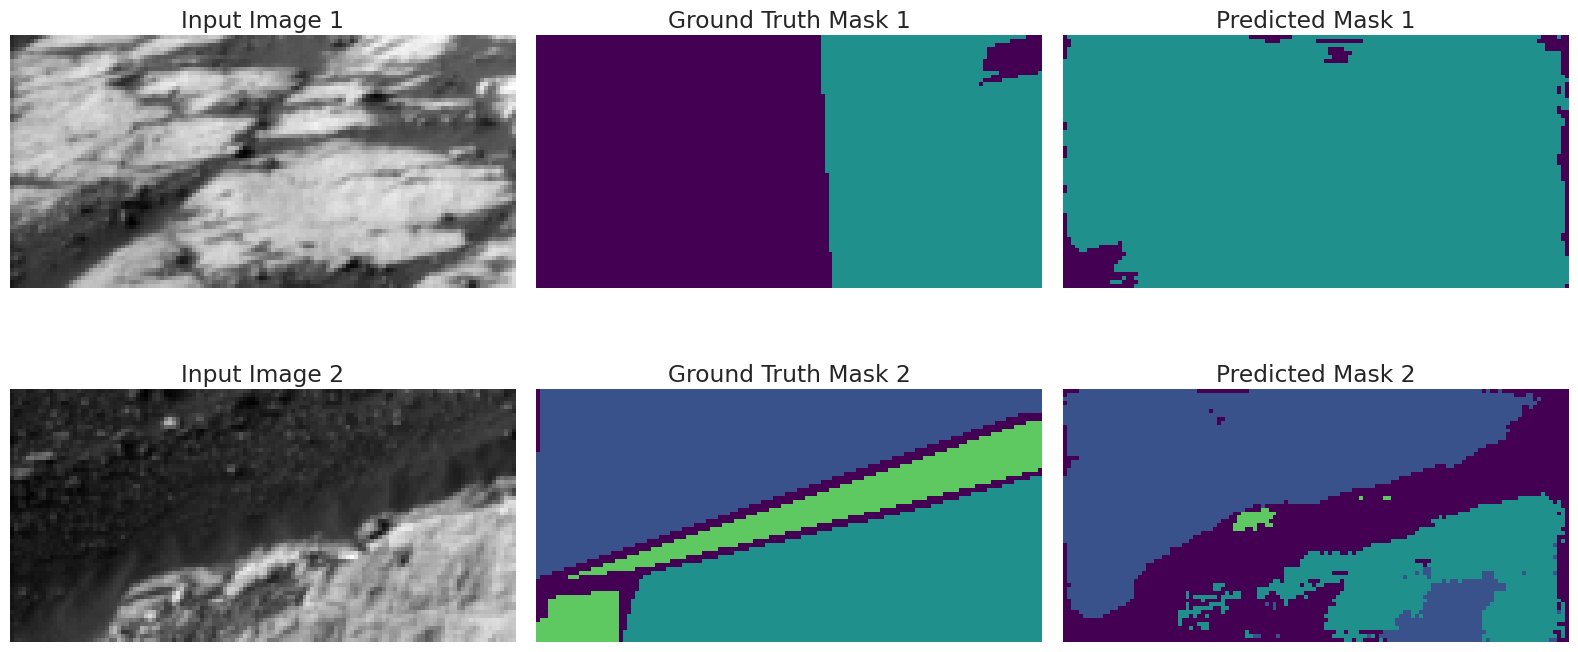

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.6921 - loss: 0.7038 - mean_iou: 0.4031 - val_accuracy: 0.7085 - val_loss: 0.6802 - val_mean_iou: 0.4179 - learning_rate: 1.0000e-04
Epoch 37/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 0.6893 - loss: 0.7051 - mean_iou: 0.3950 - val_accuracy: 0.7077 - val_loss: 0.6814 - val_mean_iou: 0.4185 - learning_rate: 1.0000e-04
Epoch 38/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - accuracy: 0.6854 - loss: 0.7043 - mean_iou: 0.3951 - val_accuracy: 0.7109 - val_loss: 0.6776 - val_mean_iou: 0.4085 - learning_rate: 1.0000e-04
Epoch 39/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.6948 - loss: 0.6998 - mean_iou: 0.3976 - val_accuracy: 0.7093 - val_loss: 0.6811 - val_mean_iou: 0.4088 - learning_rate: 1.0000e-04
Epoch 40/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.6660 - loss: 0.7186 - mean_iou: 0.3800 - val_accuracy: 0.7034 - val_loss: 0.6868 - val_mean_iou: 0.4011 - learning_rate: 1.0000e-04
Epoc

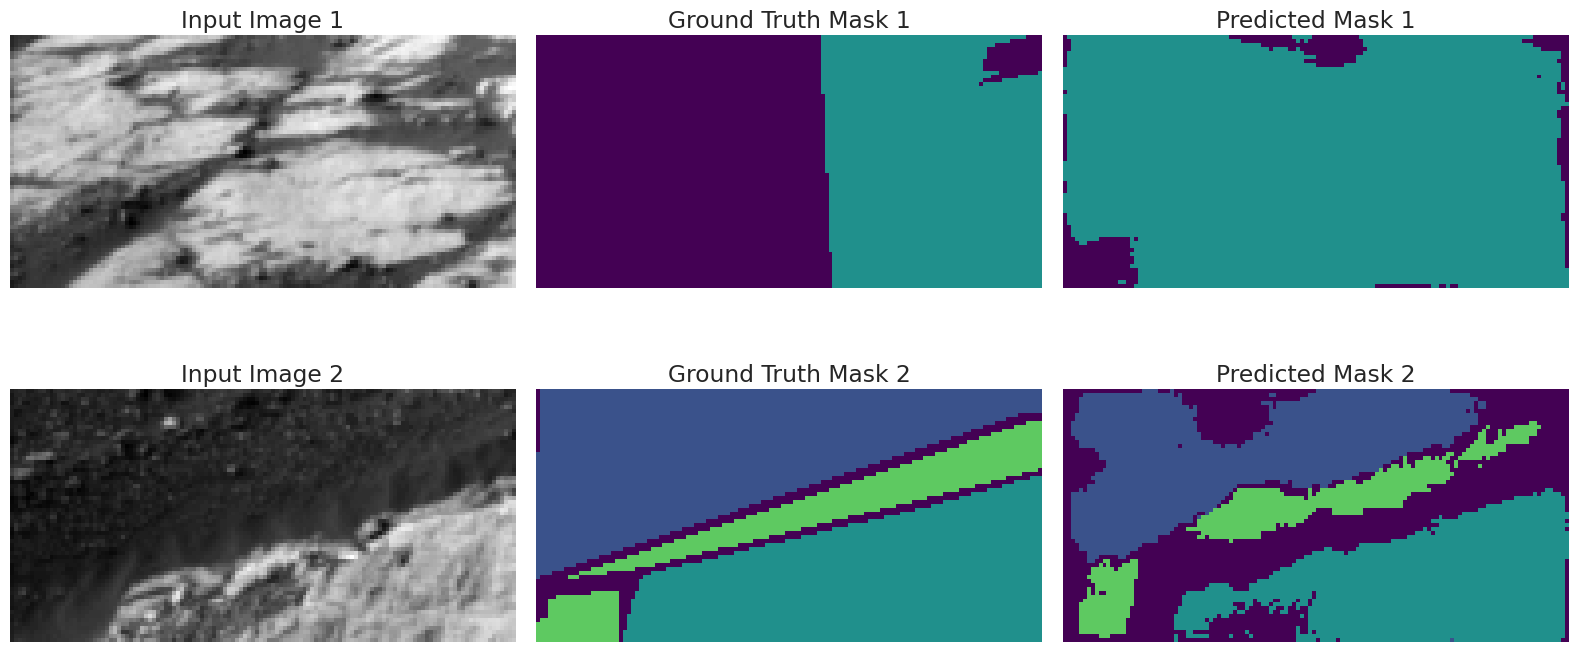

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 431ms/step - accuracy: 0.6888 - loss: 0.7089 - mean_iou: 0.4022 - val_accuracy: 0.7217 - val_loss: 0.6763 - val_mean_iou: 0.4274 - learning_rate: 1.0000e-04
Epoch 42/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.6951 - loss: 0.7039 - mean_iou: 0.4017 - val_accuracy: 0.7179 - val_loss: 0.6739 - val_mean_iou: 0.4141 - learning_rate: 1.0000e-04
Epoch 43/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 398ms/step - accuracy: 0.6929 - loss: 0.7041 - mean_iou: 0.4002 - val_accuracy: 0.7156 - val_loss: 0.6755 - val_mean_iou: 0.4185 - learning_rate: 1.0000e-04
Epoch 44/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.7019 - loss: 0.6993 - mean_iou: 0.4055 - val_accuracy: 0.7178 - val_loss: 0.6720 - val_mean_iou: 0.4131 - learning_rate: 1.0000e-04
Epoch 45/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.7045 - loss: 0.6943 - mean_iou: 0.4197 - val_accuracy: 0.7177 - val_loss: 0.6743 - val_mean_iou: 0.4164 - learning_rate: 1.0000e-04
Epoc

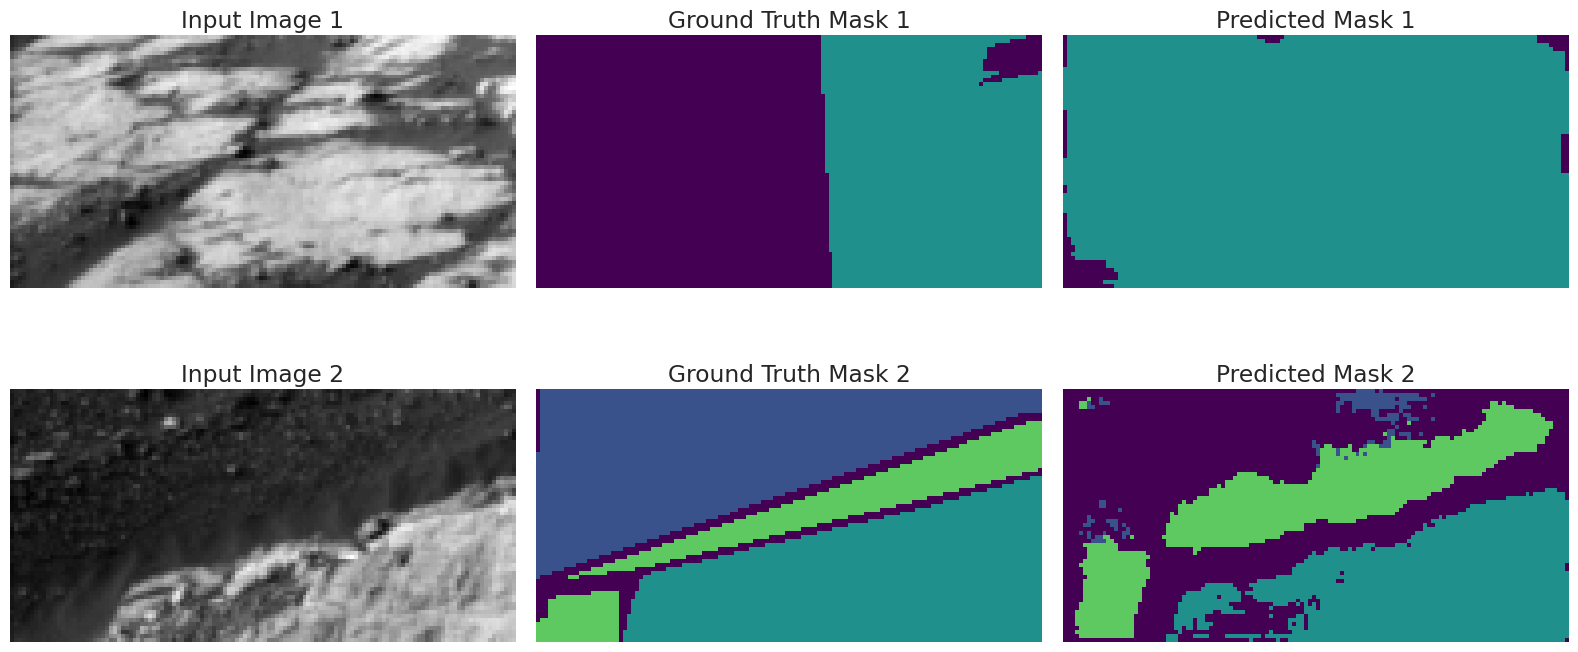

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.7039 - loss: 0.6927 - mean_iou: 0.4162 - val_accuracy: 0.7123 - val_loss: 0.6821 - val_mean_iou: 0.4169 - learning_rate: 1.0000e-04
Epoch 47/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.7019 - loss: 0.6937 - mean_iou: 0.4133 - val_accuracy: 0.7276 - val_loss: 0.6705 - val_mean_iou: 0.4333 - learning_rate: 1.0000e-04
Epoch 48/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.7066 - loss: 0.6917 - mean_iou: 0.4188 - val_accuracy: 0.7251 - val_loss: 0.6675 - val_mean_iou: 0.4207 - learning_rate: 1.0000e-04
Epoch 49/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.7085 - loss: 0.6921 - mean_iou: 0.4178 - val_accuracy: 0.7161 - val_loss: 0.6714 - val_mean_iou: 0.4217 - learning_rate: 1.0000e-04
Epoch 50/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.7043 - loss: 0.6935 - mean_iou: 0.4170 - val_accuracy: 0.6458 - val_loss: 0.7166 - val_mean_iou: 0.3537 - learning_rate: 1.0000e-04
Epoc

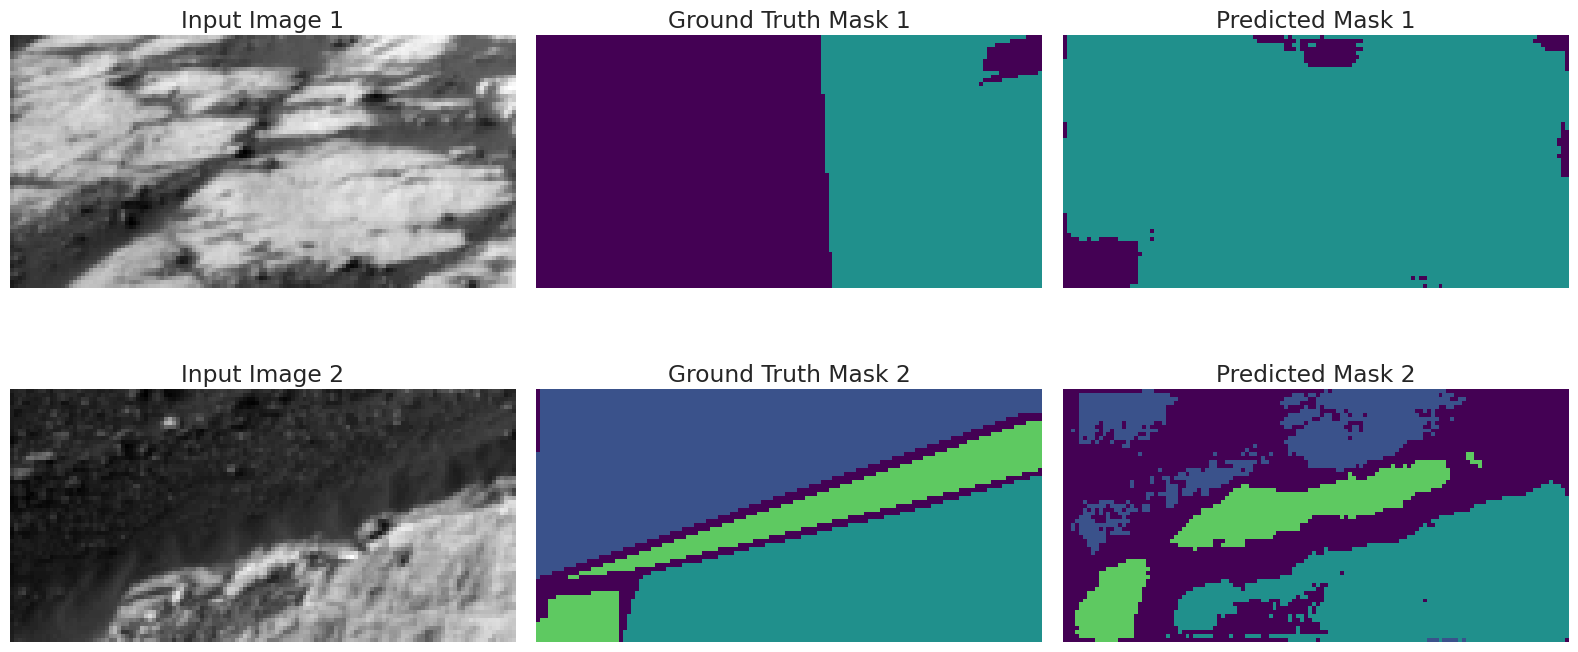

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.7112 - loss: 0.6884 - mean_iou: 0.4209 - val_accuracy: 0.7418 - val_loss: 0.6606 - val_mean_iou: 0.4437 - learning_rate: 1.0000e-04
Epoch 52/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.7102 - loss: 0.6888 - mean_iou: 0.4193 - val_accuracy: 0.7358 - val_loss: 0.6625 - val_mean_iou: 0.4468 - learning_rate: 1.0000e-04
Epoch 53/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 402ms/step - accuracy: 0.7155 - loss: 0.6889 - mean_iou: 0.4233 - val_accuracy: 0.7367 - val_loss: 0.6630 - val_mean_iou: 0.4423 - learning_rate: 1.0000e-04
Epoch 54/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 389ms/step - accuracy: 0.7225 - loss: 0.6844 - mean_iou: 0.4272 - val_accuracy: 0.7409 - val_loss: 0.6605 - val_mean_iou: 0.4514 - learning_rate: 1.0000e-04
Epoch 55/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 391ms/step - accuracy: 0.7244 - loss: 0.6825 - mean_iou: 0.4393 - val_accuracy: 0.7251 - val_loss: 0.6703 - val_mean_iou: 0.4239 - learning_rate: 1.0000e-04
Epoc

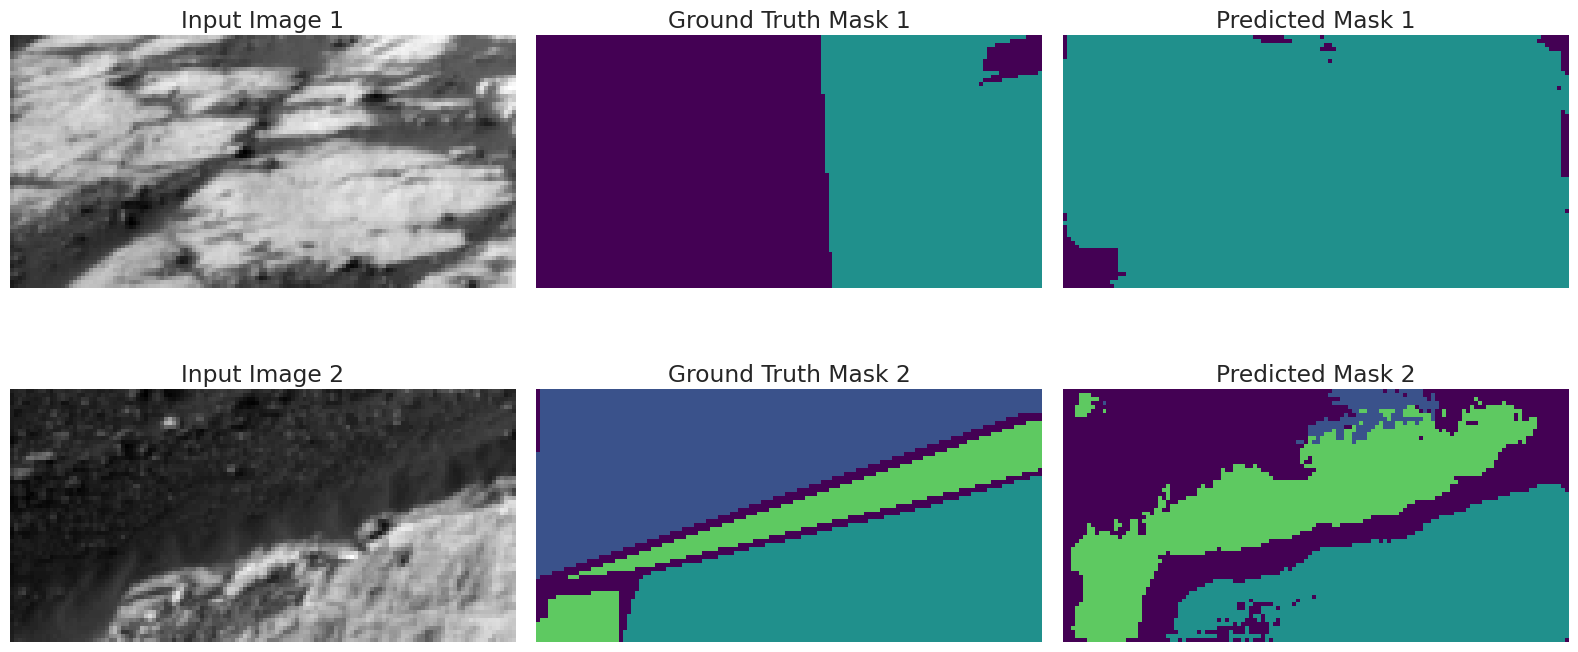

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.7243 - loss: 0.6847 - mean_iou: 0.4294 - val_accuracy: 0.7195 - val_loss: 0.6740 - val_mean_iou: 0.4251 - learning_rate: 1.0000e-04
Epoch 57/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - accuracy: 0.7181 - loss: 0.6870 - mean_iou: 0.4254 - val_accuracy: 0.7262 - val_loss: 0.6719 - val_mean_iou: 0.4382 - learning_rate: 1.0000e-04
Epoch 58/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - accuracy: 0.7260 - loss: 0.6840 - mean_iou: 0.4423 - val_accuracy: 0.7288 - val_loss: 0.6639 - val_mean_iou: 0.4396 - learning_rate: 1.0000e-04
Epoch 59/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.7363 - loss: 0.6760 - mean_iou: 0.4462 - val_accuracy: 0.7265 - val_loss: 0.6659 - val_mean_iou: 0.4349 - learning_rate: 1.0000e-04
Epoch 60/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.7216 - loss: 0.6797 - mean_iou: 0.4335 - val_accuracy: 0.7432 - val_loss: 0.6611 - val_mean_iou: 0.4518 - learning_rate: 1.0000e-04
Epoc

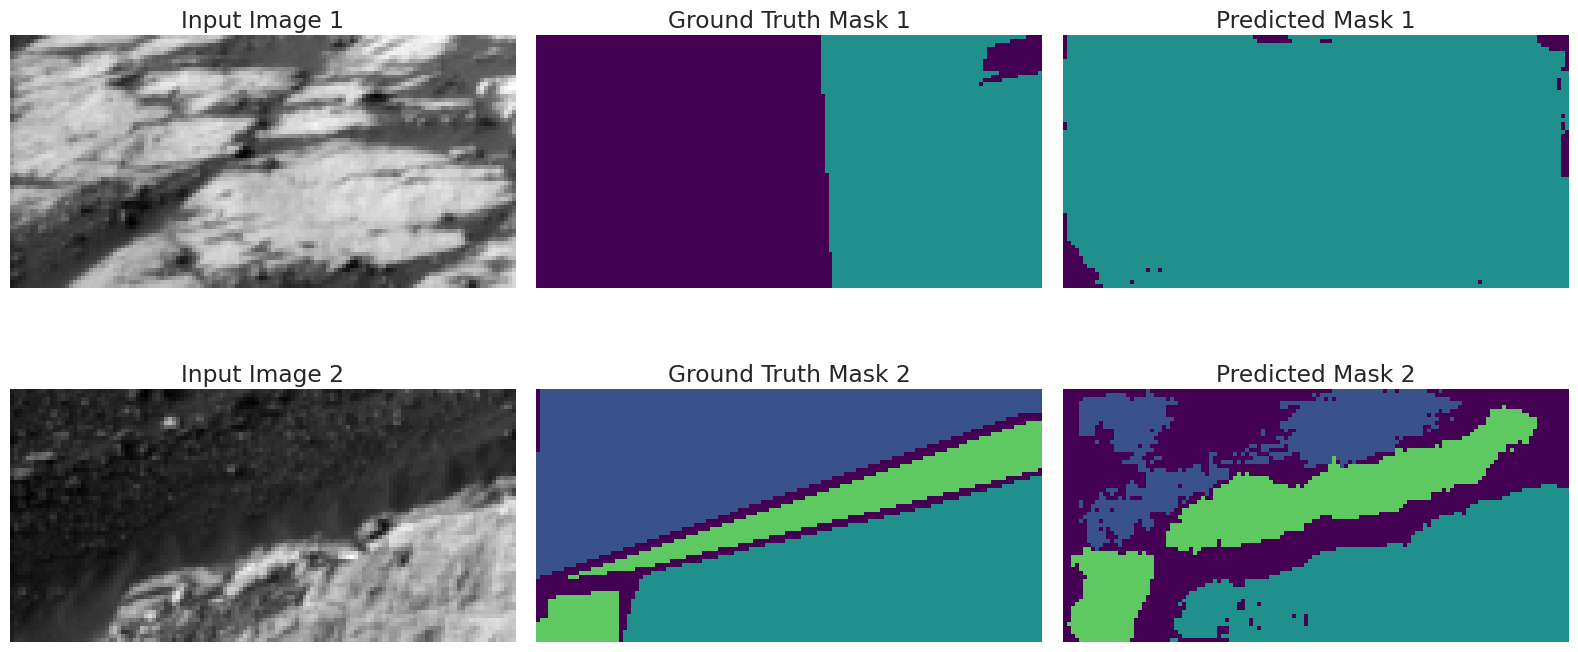

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 0.7199 - loss: 0.6793 - mean_iou: 0.4252 - val_accuracy: 0.7346 - val_loss: 0.6621 - val_mean_iou: 0.4496 - learning_rate: 1.0000e-04
Epoch 62/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.7311 - loss: 0.6778 - mean_iou: 0.4430 - val_accuracy: 0.7456 - val_loss: 0.6608 - val_mean_iou: 0.4556 - learning_rate: 1.0000e-04
Epoch 63/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.7275 - loss: 0.6793 - mean_iou: 0.4365 - val_accuracy: 0.7353 - val_loss: 0.6601 - val_mean_iou: 0.4393 - learning_rate: 1.0000e-04
Epoch 64/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - accuracy: 0.7299 - loss: 0.6812 - mean_iou: 0.4476 - val_accuracy: 0.7269 - val_loss: 0.6676 - val_mean_iou: 0.4344 - learning_rate: 1.0000e-04
Epoch 65/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.7334 - loss: 0.6752 - mean_iou: 0.4486 - val_accuracy: 0.7343 - val_loss: 0.6605 - val_mean_iou: 0.4432 - learning_rate: 1.0000e-04
Epoc

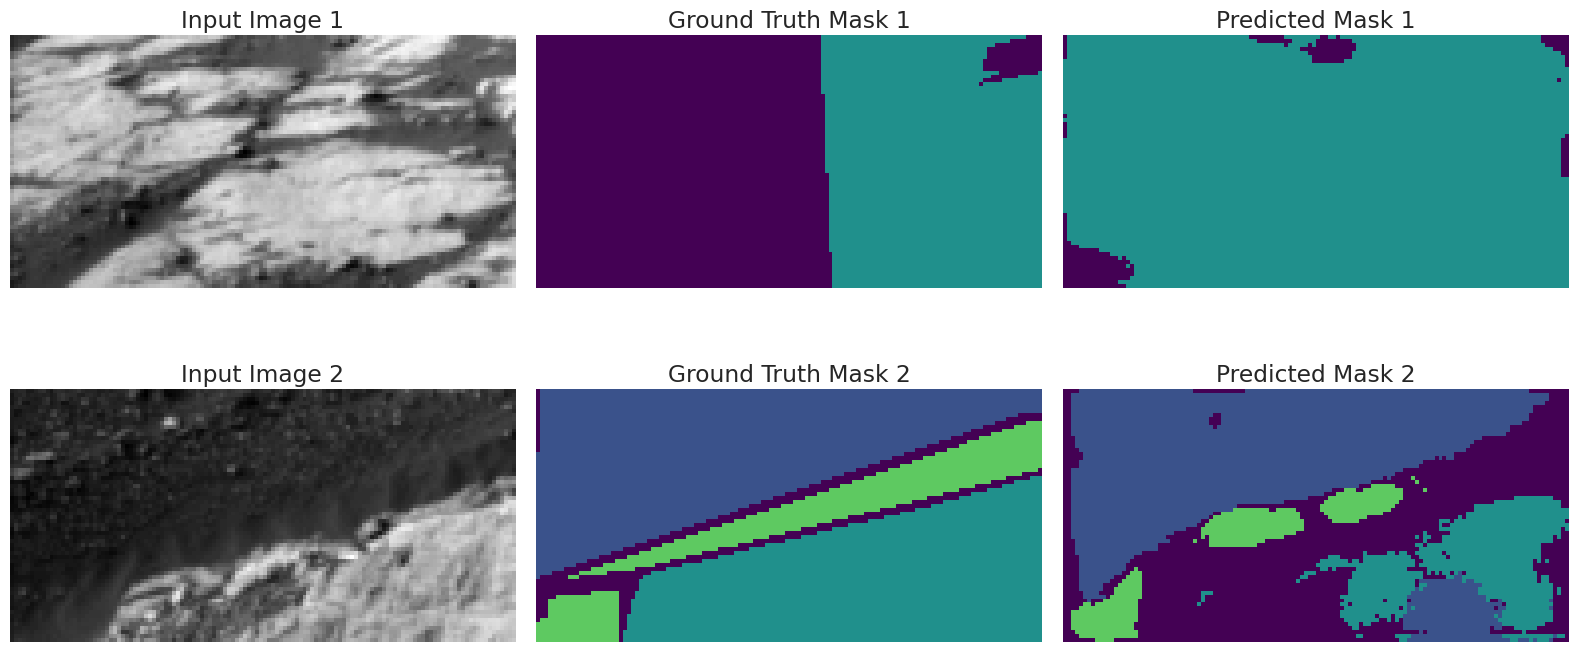

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.7367 - loss: 0.6756 - mean_iou: 0.4449 - val_accuracy: 0.7225 - val_loss: 0.6692 - val_mean_iou: 0.4217 - learning_rate: 1.0000e-04
Epoch 67/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - accuracy: 0.7350 - loss: 0.6733 - mean_iou: 0.4471 - val_accuracy: 0.7023 - val_loss: 0.6861 - val_mean_iou: 0.3976 - learning_rate: 1.0000e-04
Epoch 68/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.7372 - loss: 0.6769 - mean_iou: 0.4471 - val_accuracy: 0.7385 - val_loss: 0.6590 - val_mean_iou: 0.4433 - learning_rate: 1.0000e-04
Epoch 69/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.7372 - loss: 0.6797 - mean_iou: 0.4499 - val_accuracy: 0.7237 - val_loss: 0.6697 - val_mean_iou: 0.4183 - learning_rate: 1.0000e-04
Epoch 70/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 0.7360 - loss: 0.6716 - mean_iou: 0.4441 - val_accuracy: 0.7380 - val_loss: 0.6685 - val_mean_iou: 0.4487 - learning_rate: 1.0000e-04
Epoc

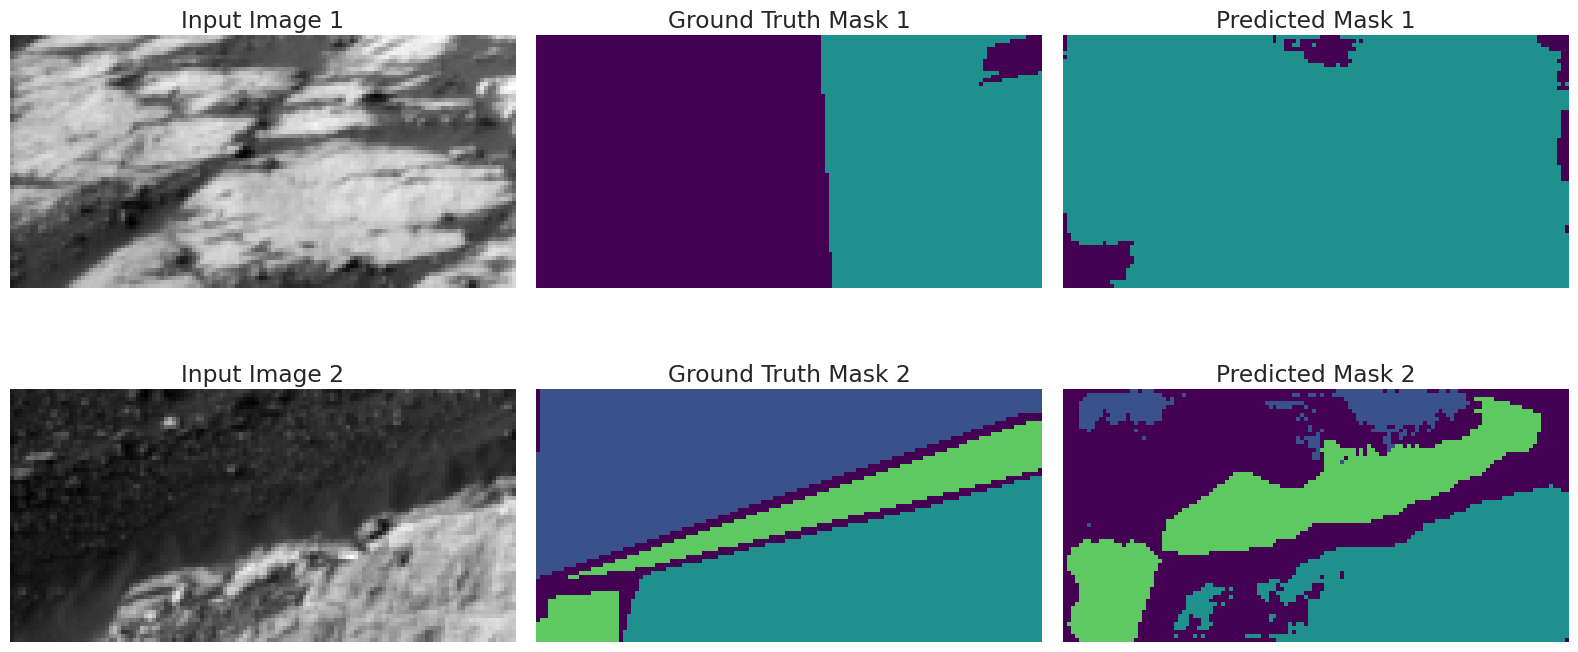

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.7237 - loss: 0.6789 - mean_iou: 0.4360 - val_accuracy: 0.7390 - val_loss: 0.6598 - val_mean_iou: 0.4489 - learning_rate: 1.0000e-04
Epoch 72/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.7359 - loss: 0.6712 - mean_iou: 0.4456 - val_accuracy: 0.7365 - val_loss: 0.6607 - val_mean_iou: 0.4479 - learning_rate: 1.0000e-04
Epoch 73/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.7412 - loss: 0.6680 - mean_iou: 0.4470 - val_accuracy: 0.7383 - val_loss: 0.6619 - val_mean_iou: 0.4391 - learning_rate: 1.0000e-04
Epoch 74/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 389ms/step - accuracy: 0.7342 - loss: 0.6731 - mean_iou: 0.4459 - val_accuracy: 0.7235 - val_loss: 0.6686 - val_mean_iou: 0.4290 - learning_rate: 1.0000e-04
Epoch 75/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.7407 - loss: 0.6669 - mean_iou: 0.4503 - val_accuracy: 0.7421 - val_loss: 0.6620 - val_mean_iou: 0.4517 - learning_rate: 1.0000e-04
Epoc

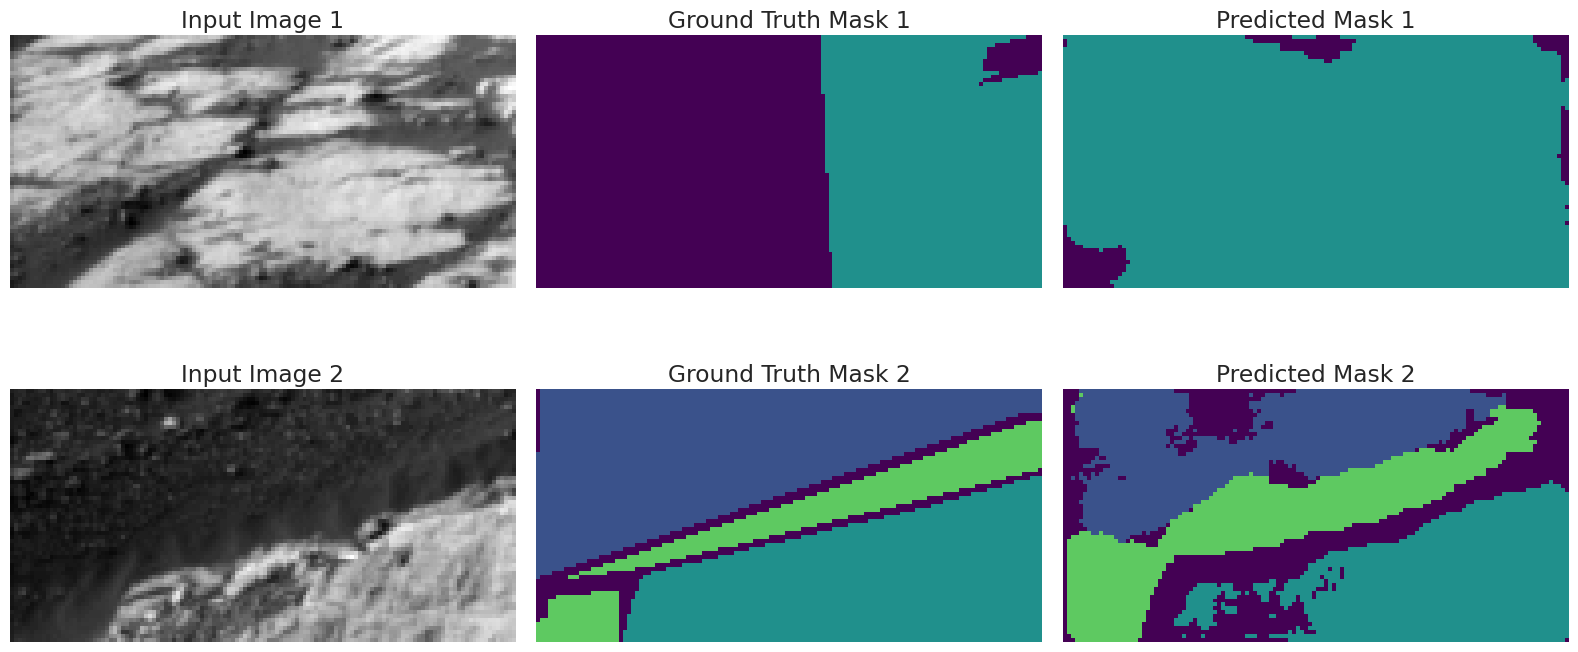

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 427ms/step - accuracy: 0.7351 - loss: 0.6701 - mean_iou: 0.4520 - val_accuracy: 0.7412 - val_loss: 0.6611 - val_mean_iou: 0.4497 - learning_rate: 1.0000e-04
Epoch 77/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step - accuracy: 0.7397 - loss: 0.6671 - mean_iou: 0.4560 - val_accuracy: 0.7407 - val_loss: 0.6591 - val_mean_iou: 0.4484 - learning_rate: 1.0000e-04
Epoch 78/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.7472 - loss: 0.6650 - mean_iou: 0.4580 - val_accuracy: 0.7240 - val_loss: 0.6643 - val_mean_iou: 0.4406 - learning_rate: 1.0000e-04
Epoch 79/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.7522 - loss: 0.6596 - mean_iou: 0.4596 - val_accuracy: 0.7427 - val_loss: 0.6602 - val_mean_iou: 0.4498 - learning_rate: 1.0000e-04
Epoch 80/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 398ms/step - accuracy: 0.7510 - loss: 0.6627 - mean_iou: 0.4590 - val_accuracy: 0.7415 - val_loss: 0.6597 - val_mean_iou: 0.4543 - learning_rate: 1.0000e-04
Epoc

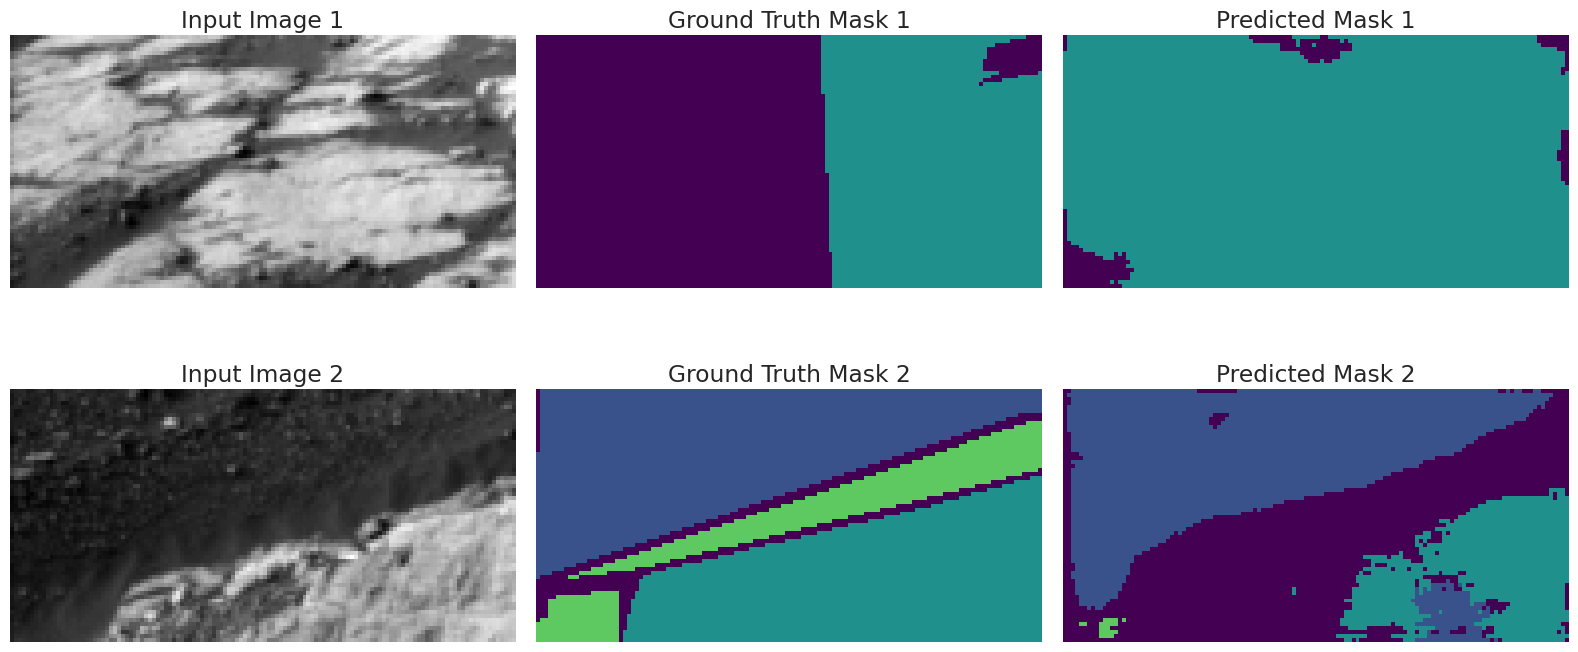

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.7518 - loss: 0.6630 - mean_iou: 0.4625 - val_accuracy: 0.7247 - val_loss: 0.6741 - val_mean_iou: 0.4212 - learning_rate: 1.0000e-04
Epoch 82/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.7501 - loss: 0.6608 - mean_iou: 0.4531 - val_accuracy: 0.7475 - val_loss: 0.6551 - val_mean_iou: 0.4570 - learning_rate: 1.0000e-04
Epoch 83/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - accuracy: 0.7498 - loss: 0.6625 - mean_iou: 0.4567 - val_accuracy: 0.7308 - val_loss: 0.6676 - val_mean_iou: 0.4367 - learning_rate: 1.0000e-04
Epoch 84/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 424ms/step - accuracy: 0.7506 - loss: 0.6601 - mean_iou: 0.4624 - val_accuracy: 0.7353 - val_loss: 0.6633 - val_mean_iou: 0.4468 - learning_rate: 1.0000e-04
Epoch 85/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.7515 - loss: 0.6613 - mean_iou: 0.4640 - val_accuracy: 0.7351 - val_loss: 0.6607 - val_mean_iou: 0.4360 - learning_rate: 1.0000e-04
Epoc

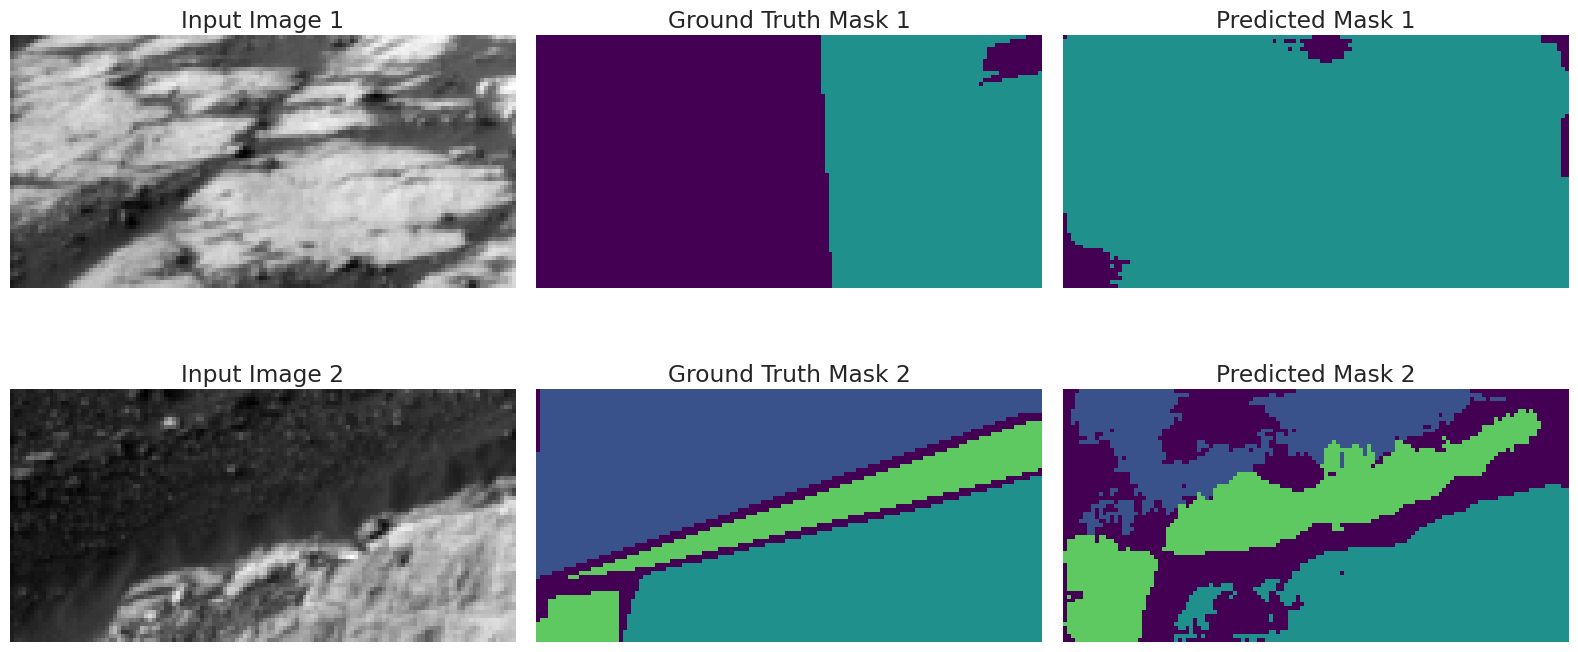

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 434ms/step - accuracy: 0.7468 - loss: 0.6596 - mean_iou: 0.4603 - val_accuracy: 0.7309 - val_loss: 0.6618 - val_mean_iou: 0.4395 - learning_rate: 1.0000e-04
Epoch 87/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.7397 - loss: 0.6662 - mean_iou: 0.4515 - val_accuracy: 0.7272 - val_loss: 0.6688 - val_mean_iou: 0.4290 - learning_rate: 1.0000e-04
Epoch 88/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.7543 - loss: 0.6580 - mean_iou: 0.4653 - val_accuracy: 0.7421 - val_loss: 0.6616 - val_mean_iou: 0.4458 - learning_rate: 1.0000e-04
Epoch 89/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.7489 - loss: 0.6580 - mean_iou: 0.4599 - val_accuracy: 0.7459 - val_loss: 0.6553 - val_mean_iou: 0.4491 - learning_rate: 1.0000e-04
Epoch 90/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.7611 - loss: 0.6553 - mean_iou: 0.4626 - val_accuracy: 0.7424 - val_loss: 0.6618 - val_mean_iou: 0.4429 - learning_rate: 1.0000e-04
Epoc

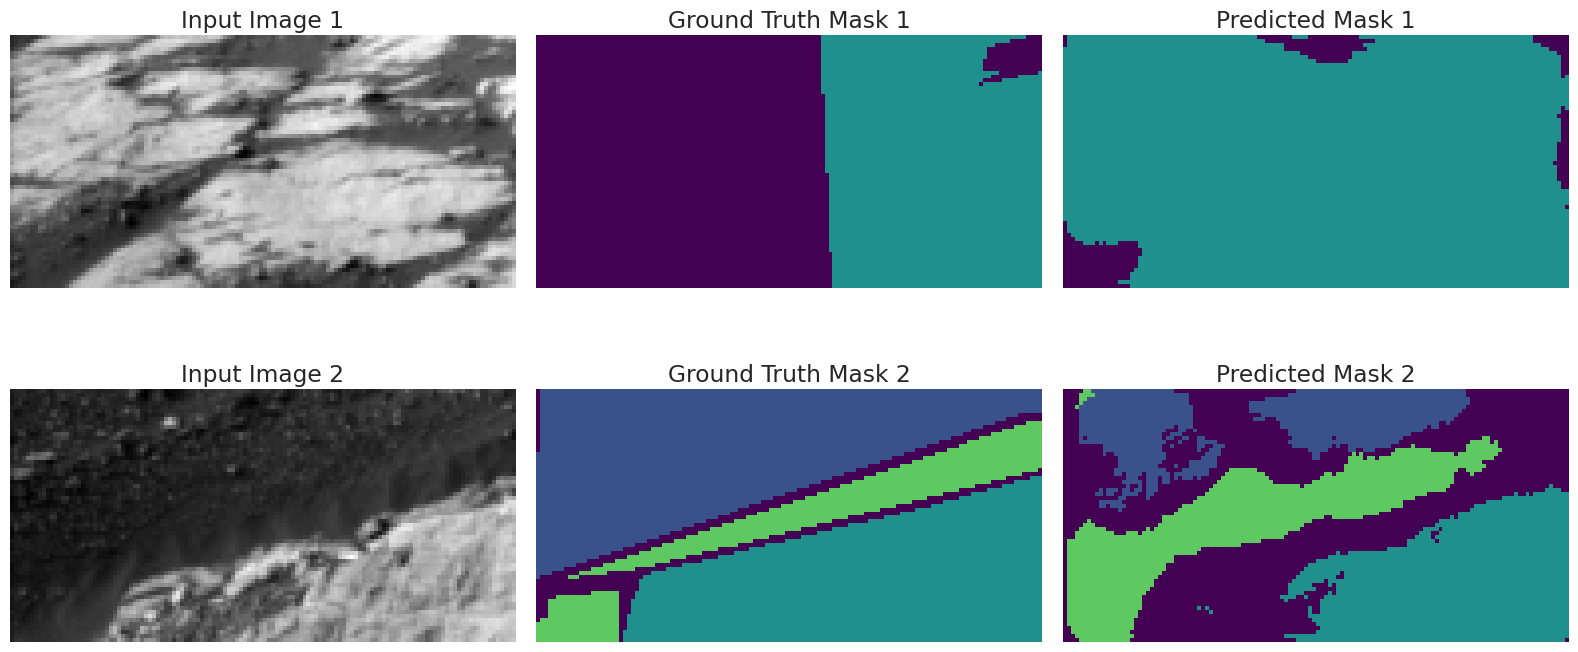

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 429ms/step - accuracy: 0.7545 - loss: 0.6581 - mean_iou: 0.4603 - val_accuracy: 0.7453 - val_loss: 0.6597 - val_mean_iou: 0.4546 - learning_rate: 1.0000e-04
Epoch 92/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 392ms/step - accuracy: 0.7393 - loss: 0.6667 - mean_iou: 0.4516 - val_accuracy: 0.7342 - val_loss: 0.6682 - val_mean_iou: 0.4424 - learning_rate: 1.0000e-04
Epoch 93/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - accuracy: 0.7543 - loss: 0.6590 - mean_iou: 0.4611 - val_accuracy: 0.7259 - val_loss: 0.6707 - val_mean_iou: 0.4301 - learning_rate: 1.0000e-04
Epoch 94/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.7590 - loss: 0.6556 - mean_iou: 0.4764 - val_accuracy: 0.7446 - val_loss: 0.6611 - val_mean_iou: 0.4521 - learning_rate: 1.0000e-04
Epoch 95/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.7508 - loss: 0.6584 - mean_iou: 0.4556 - val_accuracy: 0.7402 - val_loss: 0.6593 - val_mean_iou: 0.4393 - learning_rate: 1.0000e-04
Epoc

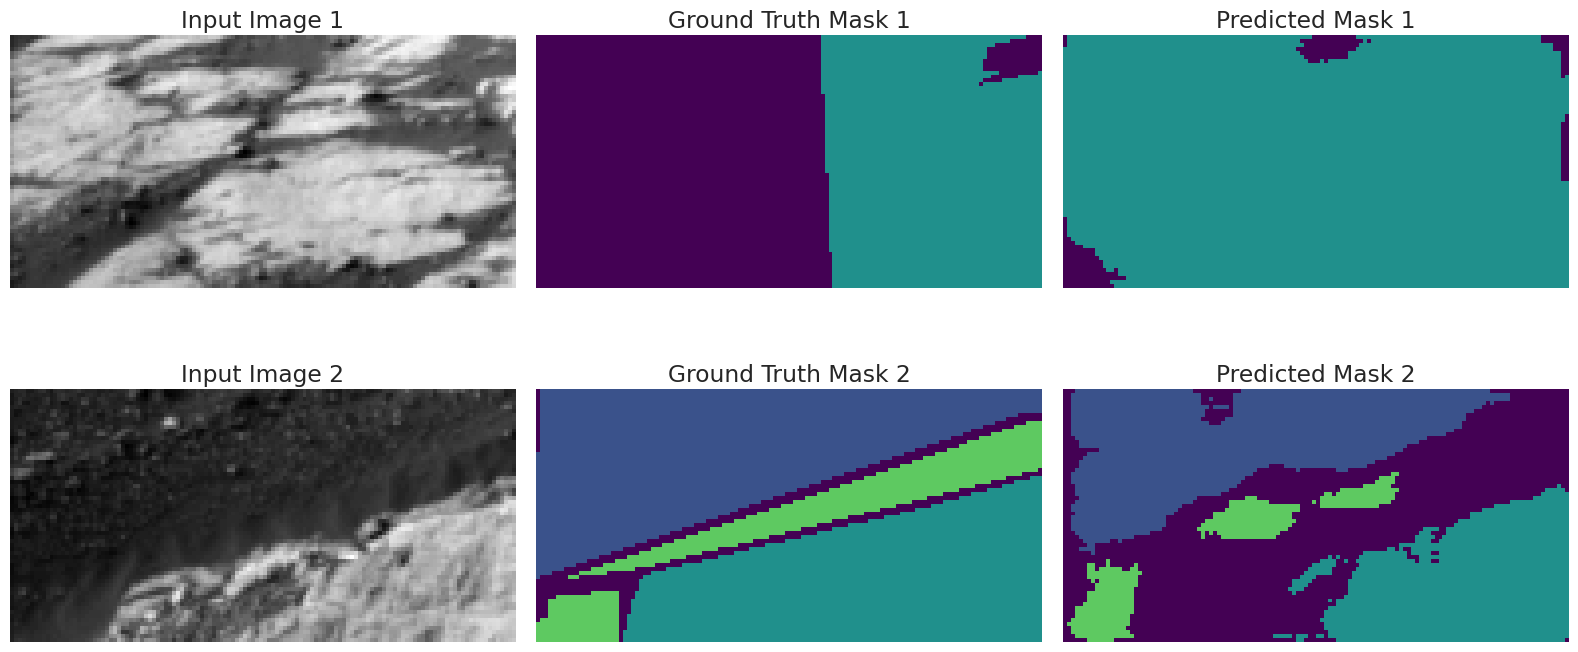

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 443ms/step - accuracy: 0.7666 - loss: 0.6494 - mean_iou: 0.4775 - val_accuracy: 0.7274 - val_loss: 0.6692 - val_mean_iou: 0.4280 - learning_rate: 1.0000e-04
Epoch 97/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.7601 - loss: 0.6536 - mean_iou: 0.4664 - val_accuracy: 0.7431 - val_loss: 0.6603 - val_mean_iou: 0.4543 - learning_rate: 1.0000e-04
Epoch 98/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.7565 - loss: 0.6548 - mean_iou: 0.4678 - val_accuracy: 0.7394 - val_loss: 0.6602 - val_mean_iou: 0.4494 - learning_rate: 1.0000e-04
Epoch 99/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 0.7662 - loss: 0.6511 - mean_iou: 0.4714 - val_accuracy: 0.7428 - val_loss: 0.6588 - val_mean_iou: 0.4431 - learning_rate: 1.0000e-04
Epoch 100/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.7663 - loss: 0.6500 - mean_iou: 0.4801 - val_accuracy: 0.7441 - val_loss: 0.6614 - val_mean_iou: 0.4430 - learning_rate: 1.0000e-04
Epo

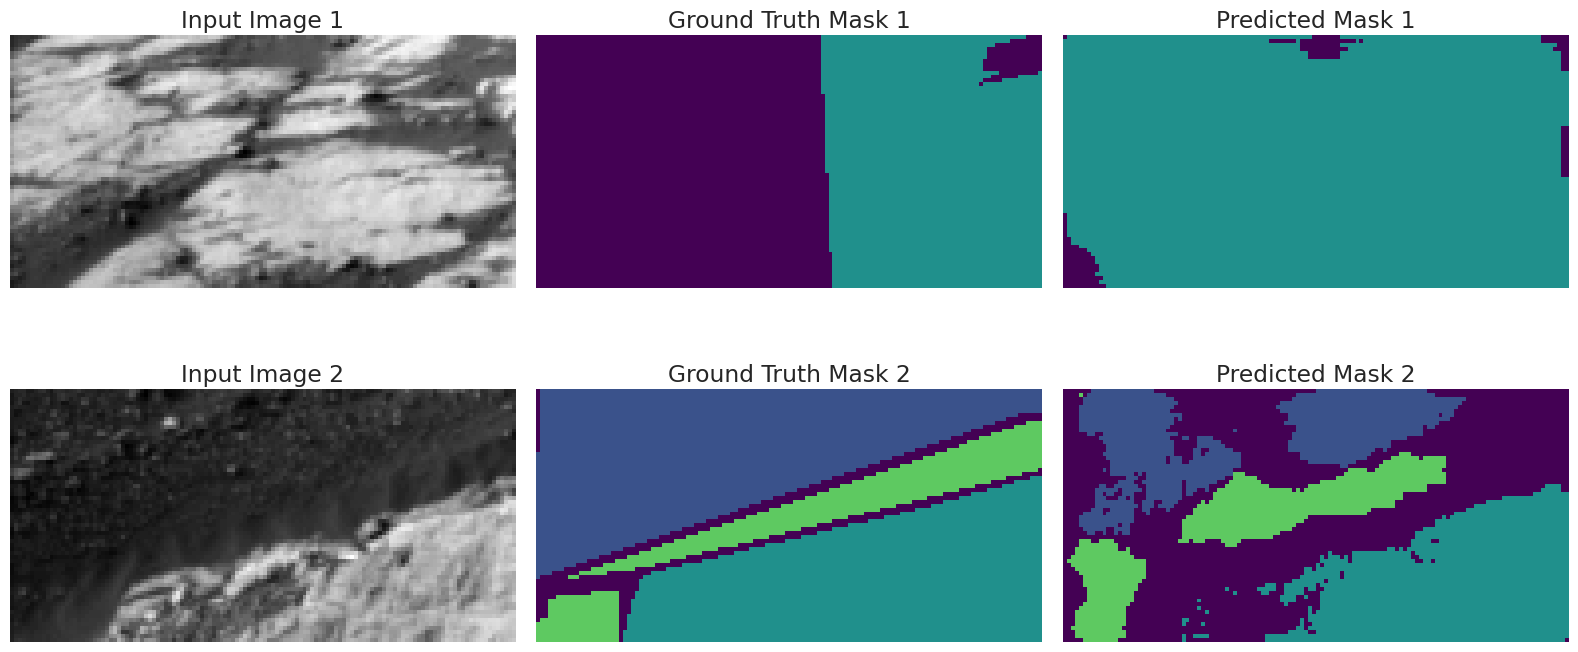

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 420ms/step - accuracy: 0.7646 - loss: 0.6502 - mean_iou: 0.4745 - val_accuracy: 0.7450 - val_loss: 0.6611 - val_mean_iou: 0.4515 - learning_rate: 1.0000e-04
Epoch 102/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.7641 - loss: 0.6519 - mean_iou: 0.4762 - val_accuracy: 0.7484 - val_loss: 0.6593 - val_mean_iou: 0.4602 - learning_rate: 1.0000e-04
Epoch 103/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 391ms/step - accuracy: 0.7670 - loss: 0.6517 - mean_iou: 0.4795 - val_accuracy: 0.7413 - val_loss: 0.6635 - val_mean_iou: 0.4518 - learning_rate: 1.0000e-04
Epoch 104/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.7685 - loss: 0.6466 - mean_iou: 0.4813 - val_accuracy: 0.7430 - val_loss: 0.6646 - val_mean_iou: 0.4487 - learning_rate: 1.0000e-04
Epoch 105/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - accuracy: 0.7737 - loss: 0.6491 - mean_iou: 0.4844 - val_accuracy: 0.7421 - val_loss: 0.6638 - val_mean_iou: 0.4505 - learning_rate: 1.0000e-04


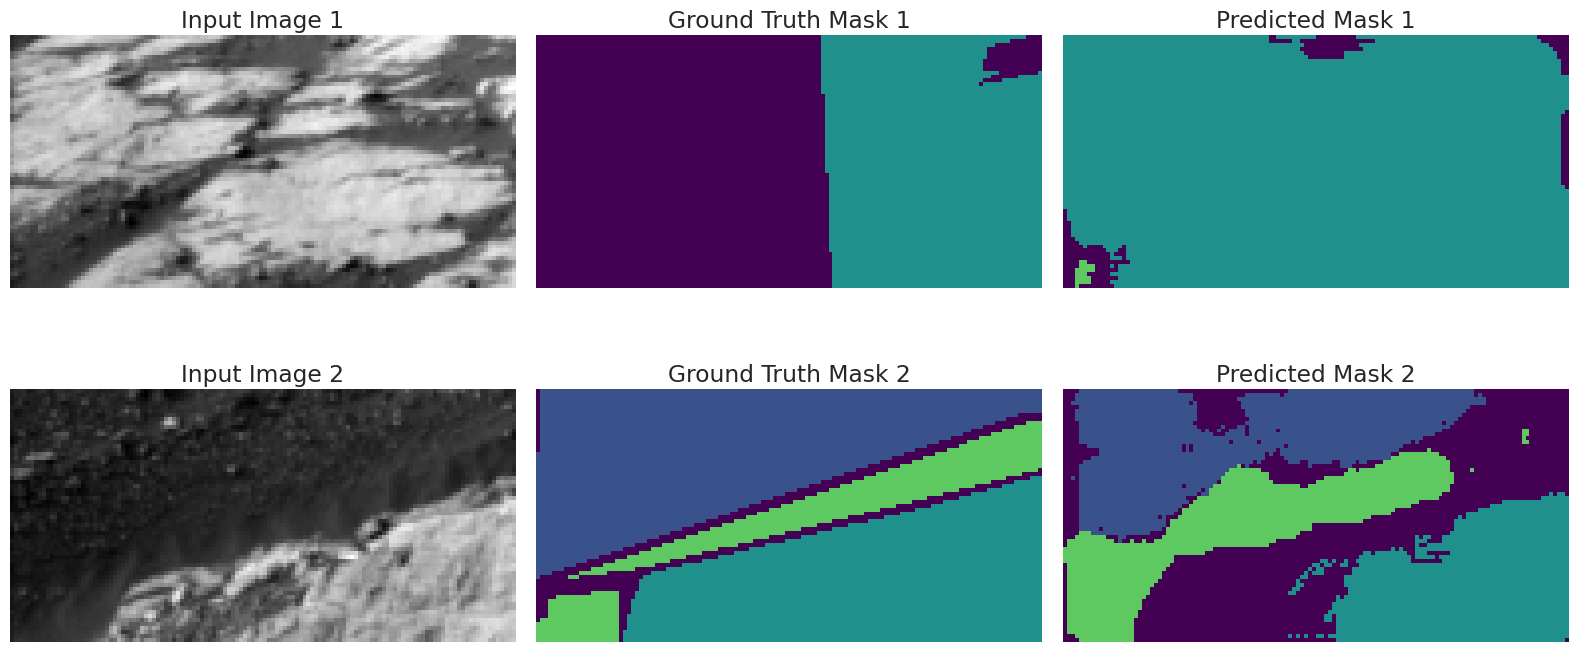

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 442ms/step - accuracy: 0.7660 - loss: 0.6469 - mean_iou: 0.4852 - val_accuracy: 0.7382 - val_loss: 0.6609 - val_mean_iou: 0.4468 - learning_rate: 1.0000e-04
Epoch 107/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 392ms/step - accuracy: 0.7811 - loss: 0.6396 - mean_iou: 0.4953 - val_accuracy: 0.7295 - val_loss: 0.6675 - val_mean_iou: 0.4315 - learning_rate: 1.0000e-04
Epoch 108/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 388ms/step - accuracy: 0.7815 - loss: 0.6411 - mean_iou: 0.4949 - val_accuracy: 0.7258 - val_loss: 0.6685 - val_mean_iou: 0.4314 - learning_rate: 1.0000e-04
Epoch 109/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 393ms/step - accuracy: 0.7766 - loss: 0.6443 - mean_iou: 0.4918 - val_accuracy: 0.7348 - val_loss: 0.6699 - val_mean_iou: 0.4400 - learning_rate: 1.0000e-04
Epoch 110/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.7731 - loss: 0.6444 - mean_iou: 0.4821 - val_accuracy: 0.7380 - val_loss: 0.6607 - val_mean_iou: 0.4481 - learning_rate: 1.0000e-04


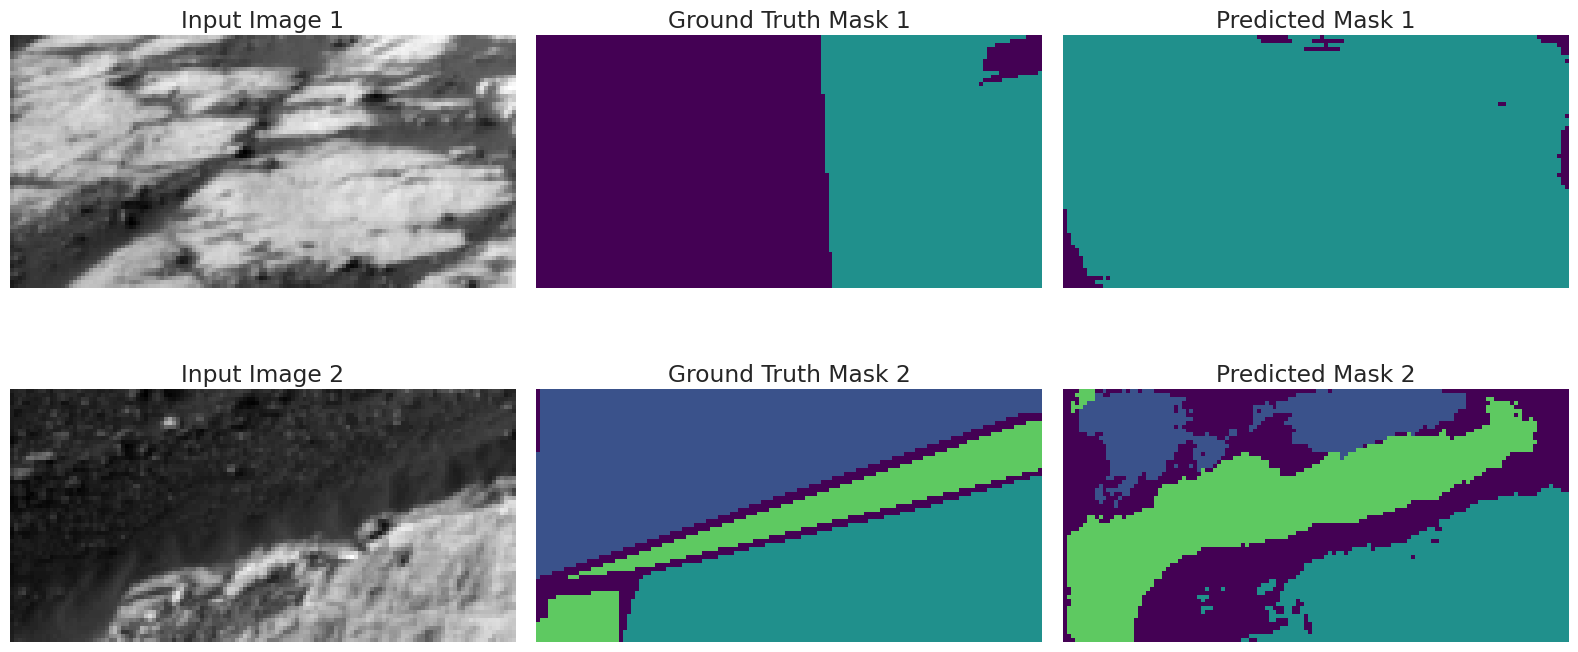

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 425ms/step - accuracy: 0.7741 - loss: 0.6434 - mean_iou: 0.4888 - val_accuracy: 0.7515 - val_loss: 0.6594 - val_mean_iou: 0.4681 - learning_rate: 1.0000e-04
Epoch 112/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 385ms/step - accuracy: 0.7786 - loss: 0.6413 - mean_iou: 0.4915 - val_accuracy: 0.7444 - val_loss: 0.6587 - val_mean_iou: 0.4459 - learning_rate: 1.0000e-04
Epoch 113/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - accuracy: 0.7771 - loss: 0.6428 - mean_iou: 0.4863 - val_accuracy: 0.7418 - val_loss: 0.6603 - val_mean_iou: 0.4440 - learning_rate: 1.0000e-04
Epoch 114/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.7779 - loss: 0.6424 - mean_iou: 0.4864 - val_accuracy: 0.7480 - val_loss: 0.6567 - val_mean_iou: 0.4506 - learning_rate: 1.0000e-04
Epoch 115/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - accuracy: 0.7739 - loss: 0.6433 - mean_iou: 0.4860 - val_accuracy: 0.7556 - val_loss: 0.6536 - val_mean_iou: 0.4654 - learning_rate: 1.0000e-04


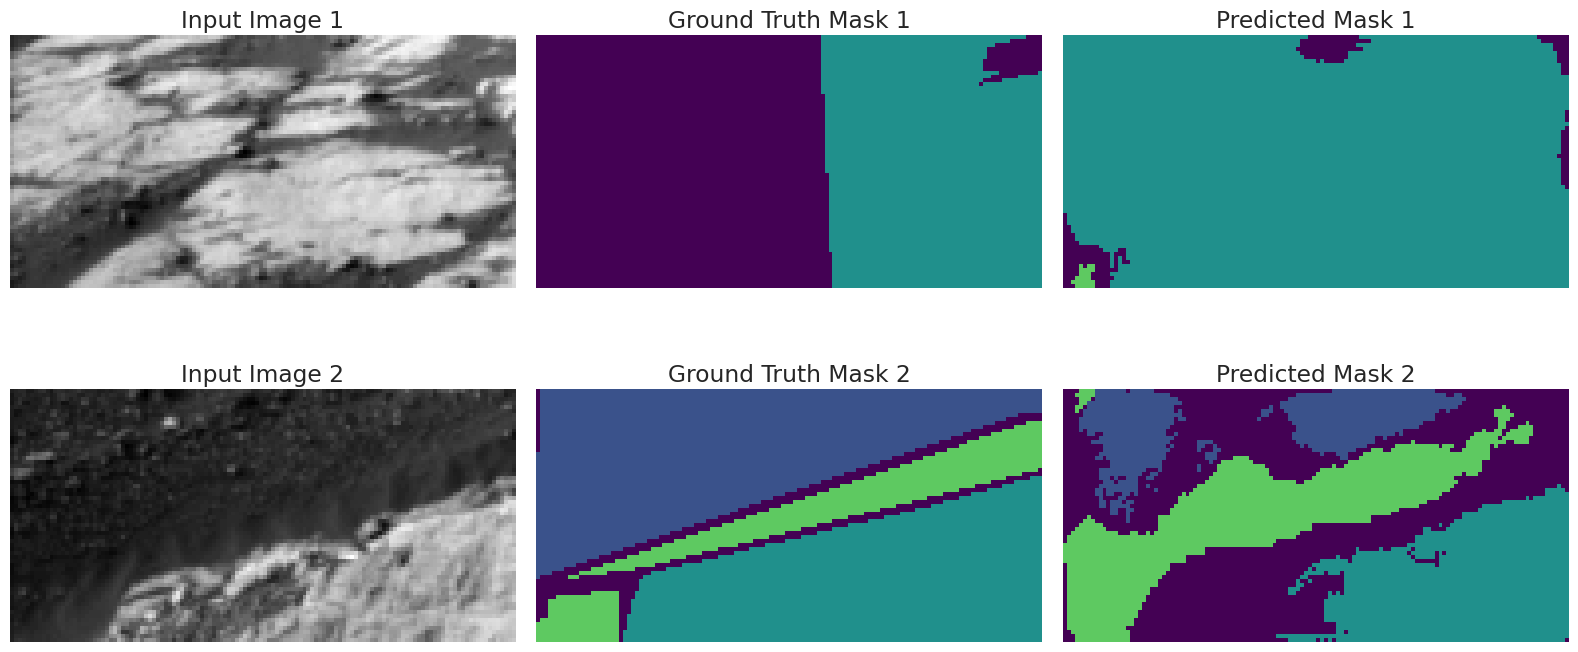

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.7797 - loss: 0.6392 - mean_iou: 0.4917 - val_accuracy: 0.7430 - val_loss: 0.6628 - val_mean_iou: 0.4507 - learning_rate: 1.0000e-04
Epoch 117/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 390ms/step - accuracy: 0.7848 - loss: 0.6397 - mean_iou: 0.4982 - val_accuracy: 0.7407 - val_loss: 0.6616 - val_mean_iou: 0.4440 - learning_rate: 1.0000e-04
Epoch 118/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.7822 - loss: 0.6396 - mean_iou: 0.4944
Epoch 118: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.7823 - loss: 0.6395 - mean_iou: 0.4943 - val_accuracy: 0.7390 - val_loss: 0.6618 - val_mean_iou: 0.4404 - learning_rate: 1.0000e-04
Epoch 119/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.7903 - loss: 0.6378 - mean_iou: 0.5041 - val_accuracy: 0.7464 - val_loss: 0.6630 - val_mean_iou: 0.4545 - learning_rate: 5.0000e-05
Epoch 120/1000
32/32 ━━━━━━━━━━

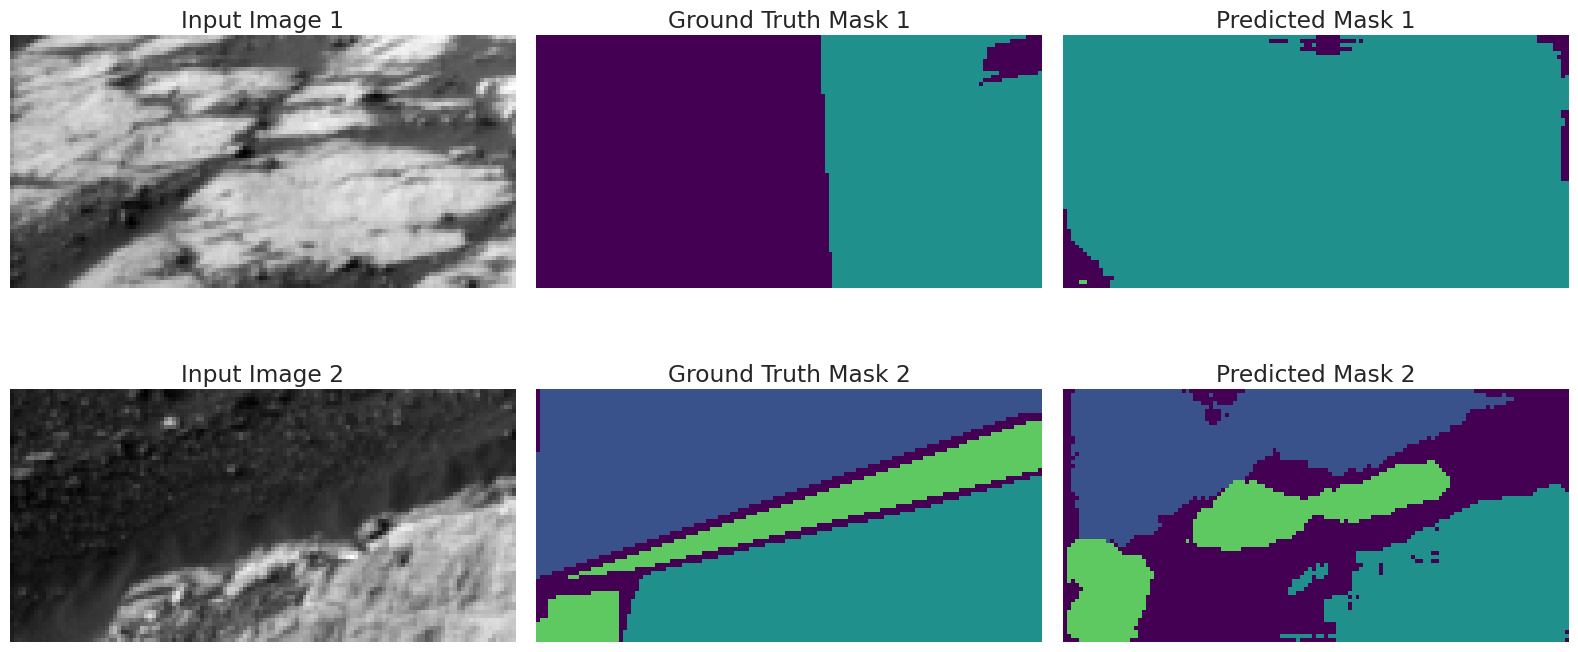

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.7889 - loss: 0.6352 - mean_iou: 0.4994 - val_accuracy: 0.7384 - val_loss: 0.6673 - val_mean_iou: 0.4453 - learning_rate: 5.0000e-05
Epoch 122/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.7927 - loss: 0.6298 - mean_iou: 0.5062 - val_accuracy: 0.7471 - val_loss: 0.6602 - val_mean_iou: 0.4562 - learning_rate: 5.0000e-05
Epoch 123/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.7902 - loss: 0.6313 - mean_iou: 0.4971 - val_accuracy: 0.7360 - val_loss: 0.6681 - val_mean_iou: 0.4470 - learning_rate: 5.0000e-05
Epoch 124/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.7843 - loss: 0.6377 - mean_iou: 0.4975 - val_accuracy: 0.7491 - val_loss: 0.6573 - val_mean_iou: 0.4648 - learning_rate: 5.0000e-05
Epoch 125/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 411ms/step - accuracy: 0.7918 - loss: 0.6321 - mean_iou: 0.5066 - val_accuracy: 0.7502 - val_loss: 0.6578 - val_mean_iou: 0.4608 - learning_rate: 5.0000e-05


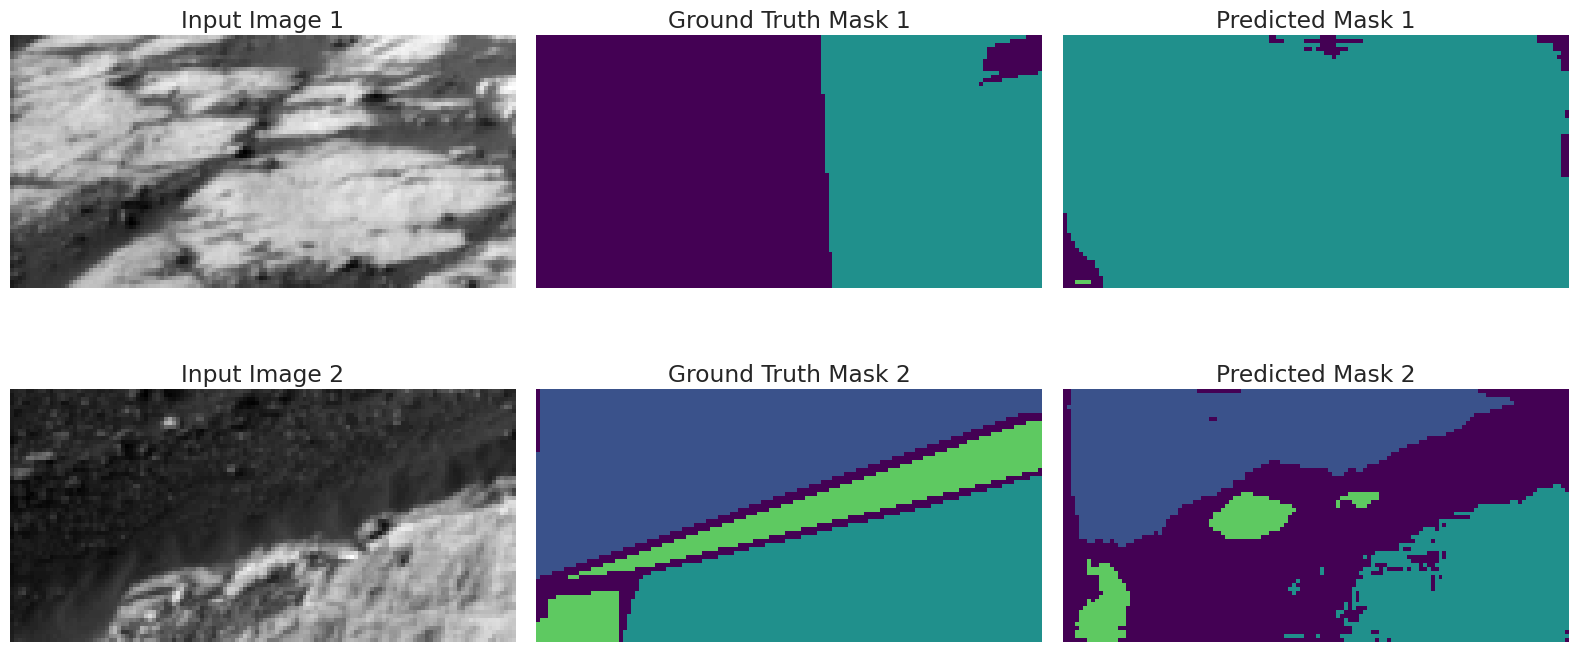

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.7913 - loss: 0.6331 - mean_iou: 0.5026 - val_accuracy: 0.7407 - val_loss: 0.6671 - val_mean_iou: 0.4467 - learning_rate: 5.0000e-05
Epoch 127/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.7911 - loss: 0.6293 - mean_iou: 0.4989 - val_accuracy: 0.7391 - val_loss: 0.6663 - val_mean_iou: 0.4497 - learning_rate: 5.0000e-05
Epoch 128/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - accuracy: 0.7945 - loss: 0.6294 - mean_iou: 0.5006 - val_accuracy: 0.7286 - val_loss: 0.6732 - val_mean_iou: 0.4369 - learning_rate: 5.0000e-05
Epoch 129/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.7970 - loss: 0.6303 - mean_iou: 0.5119 - val_accuracy: 0.7399 - val_loss: 0.6639 - val_mean_iou: 0.4479 - learning_rate: 5.0000e-05
Epoch 130/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 398ms/step - accuracy: 0.7904 - loss: 0.6320 - mean_iou: 0.5053 - val_accuracy: 0.7345 - val_loss: 0.6686 - val_mean_iou: 0.4462 - learning_rate: 5.0000e-05


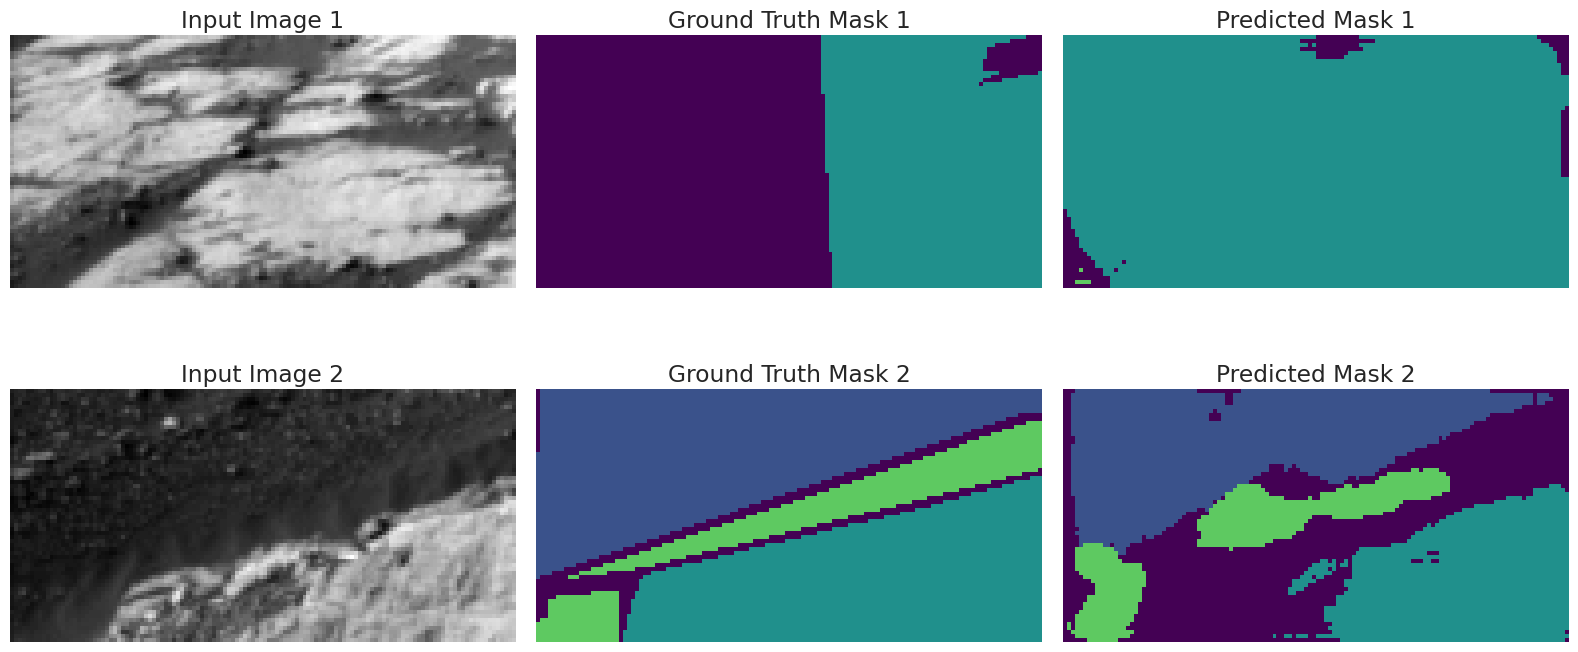

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 428ms/step - accuracy: 0.7992 - loss: 0.6273 - mean_iou: 0.5073 - val_accuracy: 0.7372 - val_loss: 0.6690 - val_mean_iou: 0.4485 - learning_rate: 5.0000e-05
Epoch 132/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.7950 - loss: 0.6294 - mean_iou: 0.5053 - val_accuracy: 0.7465 - val_loss: 0.6626 - val_mean_iou: 0.4589 - learning_rate: 5.0000e-05
Epoch 133/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.8034 - loss: 0.6254 - mean_iou: 0.5175 - val_accuracy: 0.7411 - val_loss: 0.6668 - val_mean_iou: 0.4528 - learning_rate: 5.0000e-05
Epoch 134/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.8001 - loss: 0.6264 - mean_iou: 0.5098 - val_accuracy: 0.7446 - val_loss: 0.6639 - val_mean_iou: 0.4528 - learning_rate: 5.0000e-05
Epoch 135/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 405ms/step - accuracy: 0.7987 - loss: 0.6274 - mean_iou: 0.5119 - val_accuracy: 0.7371 - val_loss: 0.6703 - val_mean_iou: 0.4429 - learning_rate: 5.0000e-05


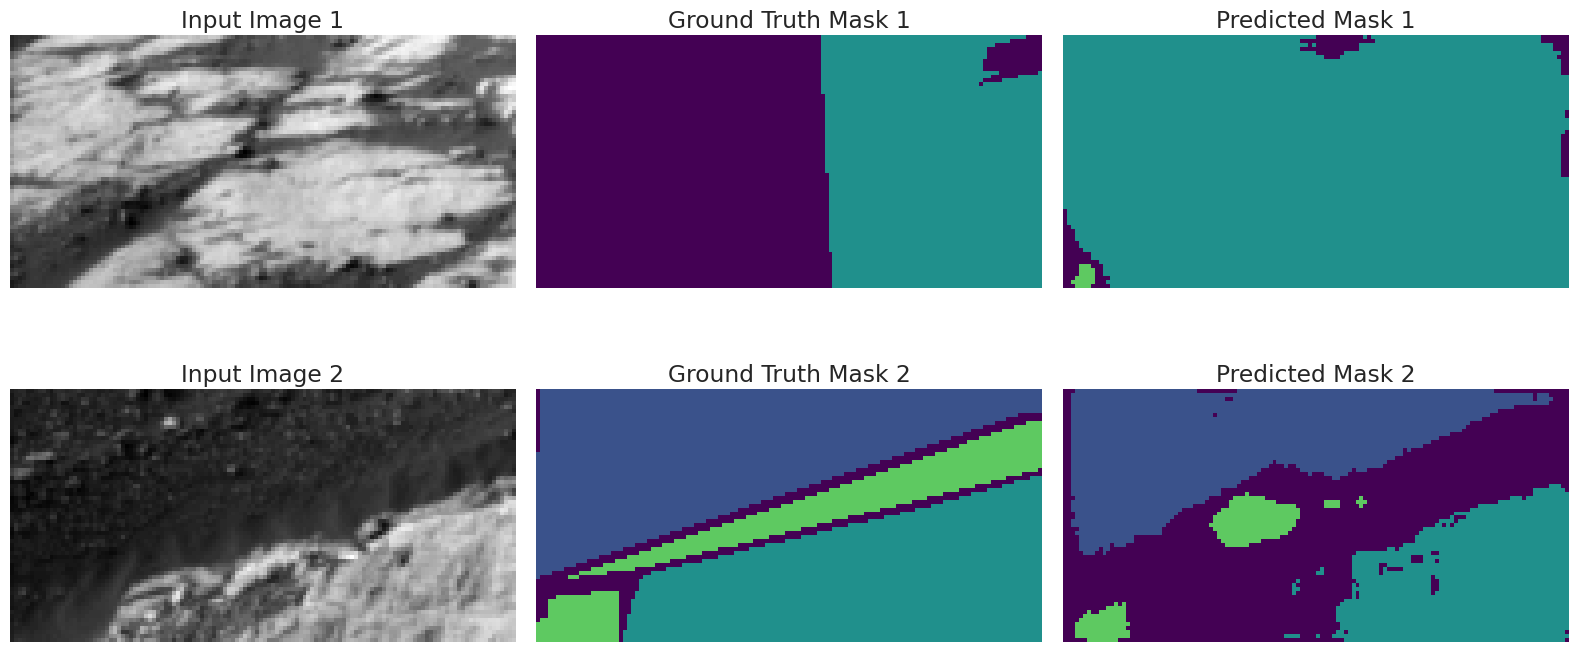

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.7984 - loss: 0.6281 - mean_iou: 0.5149 - val_accuracy: 0.7457 - val_loss: 0.6615 - val_mean_iou: 0.4525 - learning_rate: 5.0000e-05
Epoch 137/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 395ms/step - accuracy: 0.7975 - loss: 0.6277 - mean_iou: 0.5133 - val_accuracy: 0.7446 - val_loss: 0.6628 - val_mean_iou: 0.4482 - learning_rate: 5.0000e-05
Epoch 138/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 395ms/step - accuracy: 0.8001 - loss: 0.6256 - mean_iou: 0.5075 - val_accuracy: 0.7399 - val_loss: 0.6686 - val_mean_iou: 0.4585 - learning_rate: 5.0000e-05
Epoch 139/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.8013 - loss: 0.6245 - mean_iou: 0.5221 - val_accuracy: 0.7439 - val_loss: 0.6680 - val_mean_iou: 0.4559 - learning_rate: 5.0000e-05
Epoch 140/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 0.7930 - loss: 0.6290 - mean_iou: 0.5043 - val_accuracy: 0.7467 - val_loss: 0.6591 - val_mean_iou: 0.4585 - learning_rate: 5.0000e-05


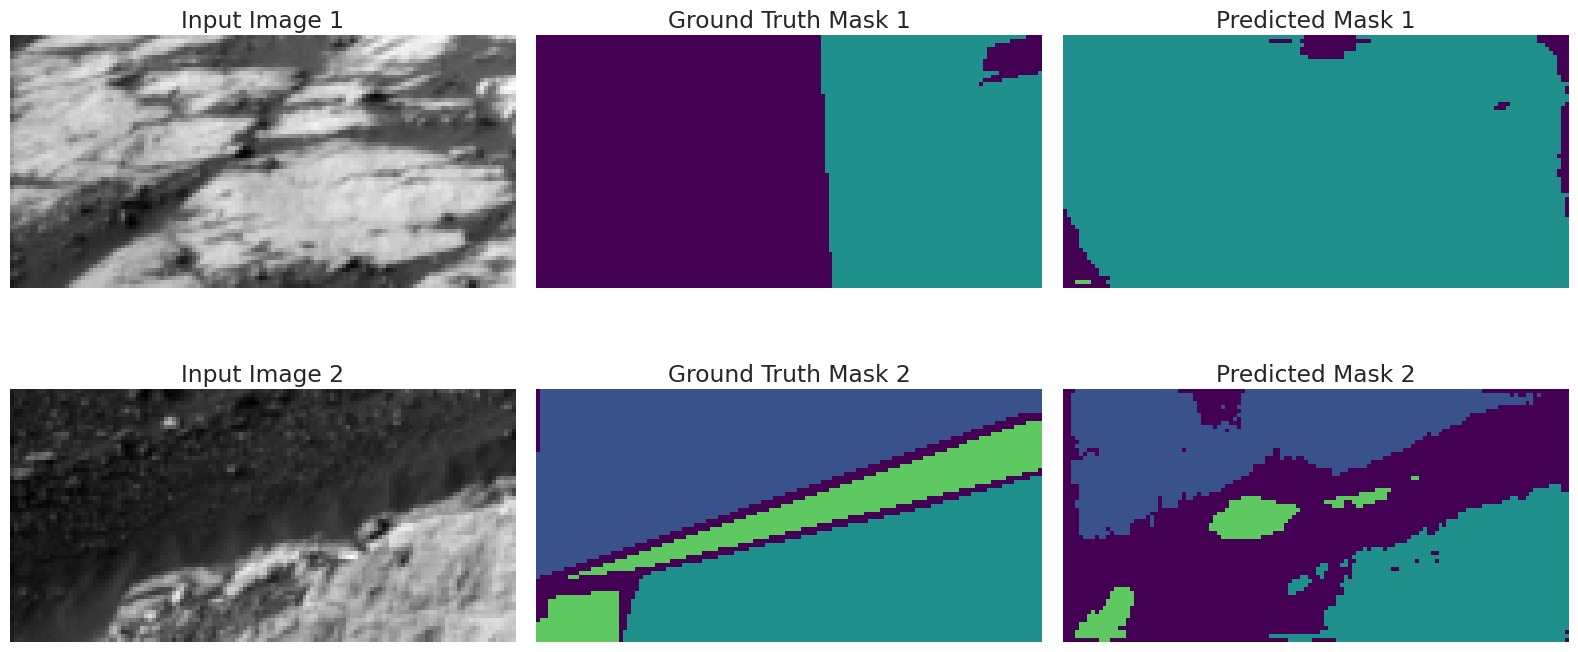

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.7969 - loss: 0.6261 - mean_iou: 0.5105 - val_accuracy: 0.7360 - val_loss: 0.6707 - val_mean_iou: 0.4422 - learning_rate: 5.0000e-05
Epoch 142/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.8009 - loss: 0.6237 - mean_iou: 0.5126 - val_accuracy: 0.7422 - val_loss: 0.6660 - val_mean_iou: 0.4511 - learning_rate: 5.0000e-05
Epoch 143/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 398ms/step - accuracy: 0.7990 - loss: 0.6265 - mean_iou: 0.5055 - val_accuracy: 0.7385 - val_loss: 0.6696 - val_mean_iou: 0.4479 - learning_rate: 5.0000e-05
Epoch 144/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 0.7987 - loss: 0.6246 - mean_iou: 0.5091 - val_accuracy: 0.7480 - val_loss: 0.6649 - val_mean_iou: 0.4596 - learning_rate: 5.0000e-05
Epoch 145/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.8012 - loss: 0.6252 - mean_iou: 0.5124 - val_accuracy: 0.7489 - val_loss: 0.6645 - val_mean_iou: 0.4634 - learning_rate: 5.0000e-05


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Configure the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='loss',        # The metric to monitor, typically 'loss' or 'val_loss'
    factor=0.5,            # The factor by which the learning rate will be reduced (e.g., halve the learning rate)
    patience=10,           # Number of epochs with no improvement before reducing the learning rate
    min_lr=1e-6,           # Minimum learning rate
    verbose=1              # Displays a message when the learning rate is reduced
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr, viz_callback],  # List of callbacks
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'UNet_'+str(final_val_meanIoU)+'.keras'
#model.save(model_filename)

# Delete the model to free up resources
#del model


In [ ]:
weights_filename = 'UNet_weights_' + str(final_val_meanIoU) + '.weights.h5'
model.save_weights(weights_filename)

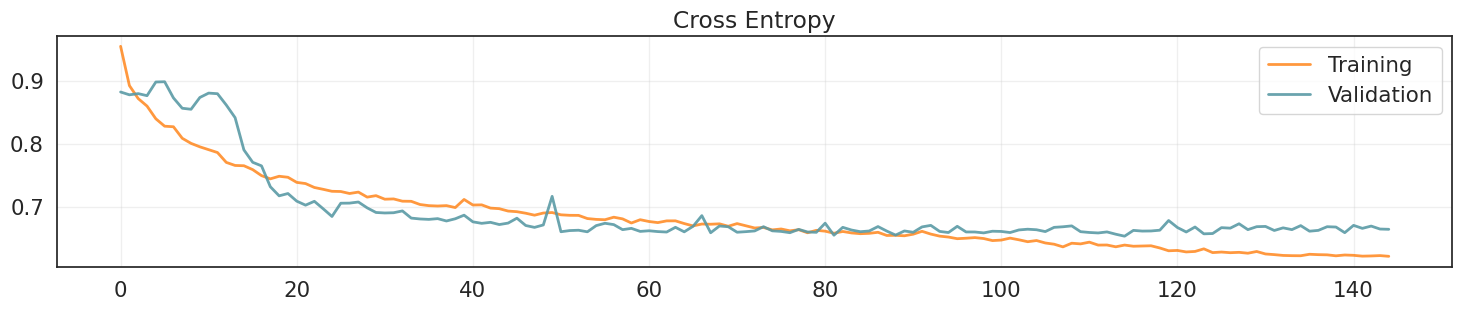

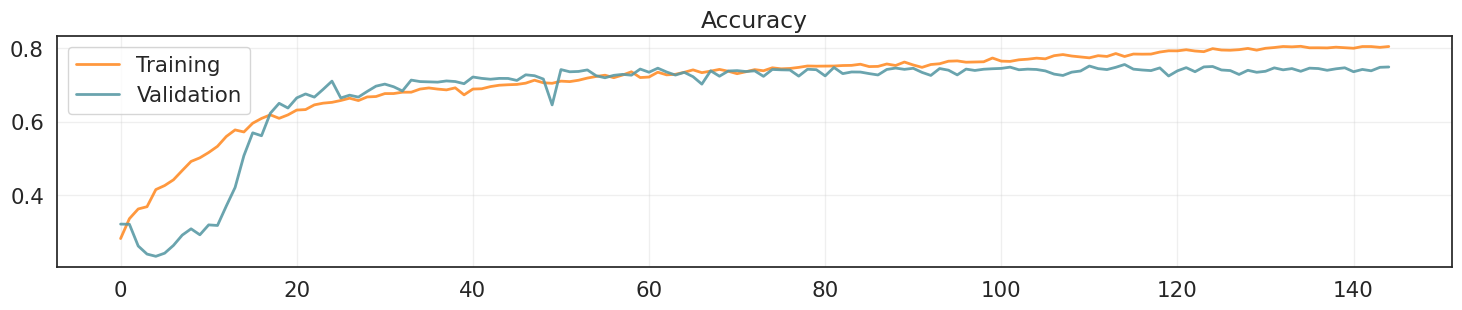

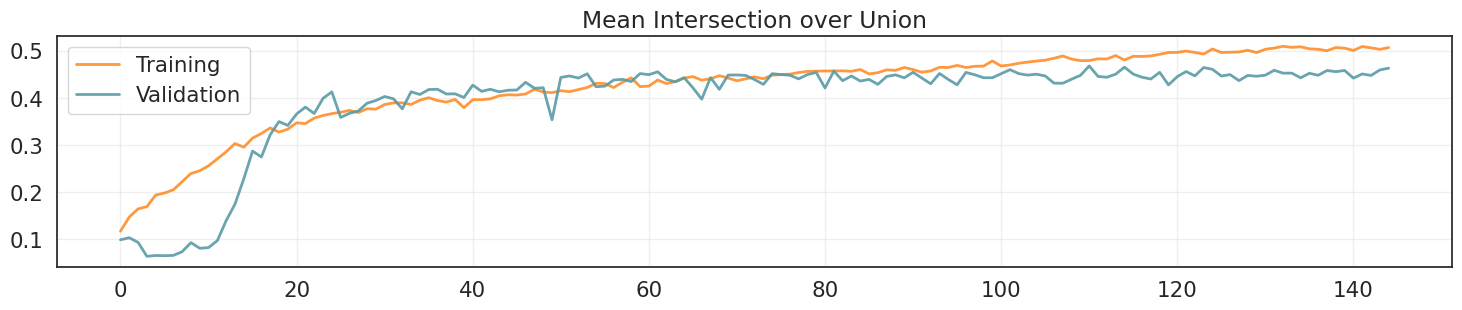

In [ ]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Above, you can see the progress of the Loss function and of the accuracy and miou for both Training and Validation during the model training

###make inference

We can now use the trained model to see how it performs on a test dataset, never seen by the model before

In [ ]:
# Create the model with the same architecture
model = get_unet_model(input_shape=(64, 128, 1), num_classes=5)

# Load the weights
model.load_weights(weights_filename)

# Compile the model with specified loss, optimizer, and metrics
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tfk.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])]
)

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
#tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)


Model: "UNet_MultiScale_Gating"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_co… │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_co… │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_bn1 │ (None, 64, 128, 32)  │          128 │ down_block1_global… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ln1 │ (None, 64, 128, 32)  │           64 │ down_block1_detail… │    Y    │
│ (LayerNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_global… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_detail… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_co… │ (None, 64, 128, 32)  │        9,248 │ down_block1_global… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_co… │ (None, 64, 128, 32)  │        9,248 │ down_block1_detail… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_bn2 │ (None, 64, 128, 32)  │          128 │ down_block1_global… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ln2 │ (None, 64, 128, 32)  │           64 │ down_block1_detail… │    Y    │
│ (LayerNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_global_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_global… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_detail_ac… │ (None, 64, 128, 32)  │            0 │ down_block1_detail… │    -    │
│ (Activation)           │                      │              │                     │         │
├──────────────────────

 Total params: 2,177,835 (8.31 MB)

 Trainable params: 2,176,939 (8.30 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Evaluate the model on the test set and print the results
test_loss, test_accuracy, test_mean_iou = model.evaluate(test_dataset, verbose=0, batch_size=10)
print(f'Test Accuracy: {round(test_accuracy, 4)}')
print(f'Test Mean Intersection over Union: {round(test_mean_iou, 4)}')

Test Accuracy: 0.7686
Test Mean Intersection over Union: 0.4498


Above, we can see the results from the predictions made on the test dataset

Below, we process the test dataset, generating predictions using the trained model. Random samples are visualized, displaying the original image, the true mask, and the predicted mask to evaluate the model's performance

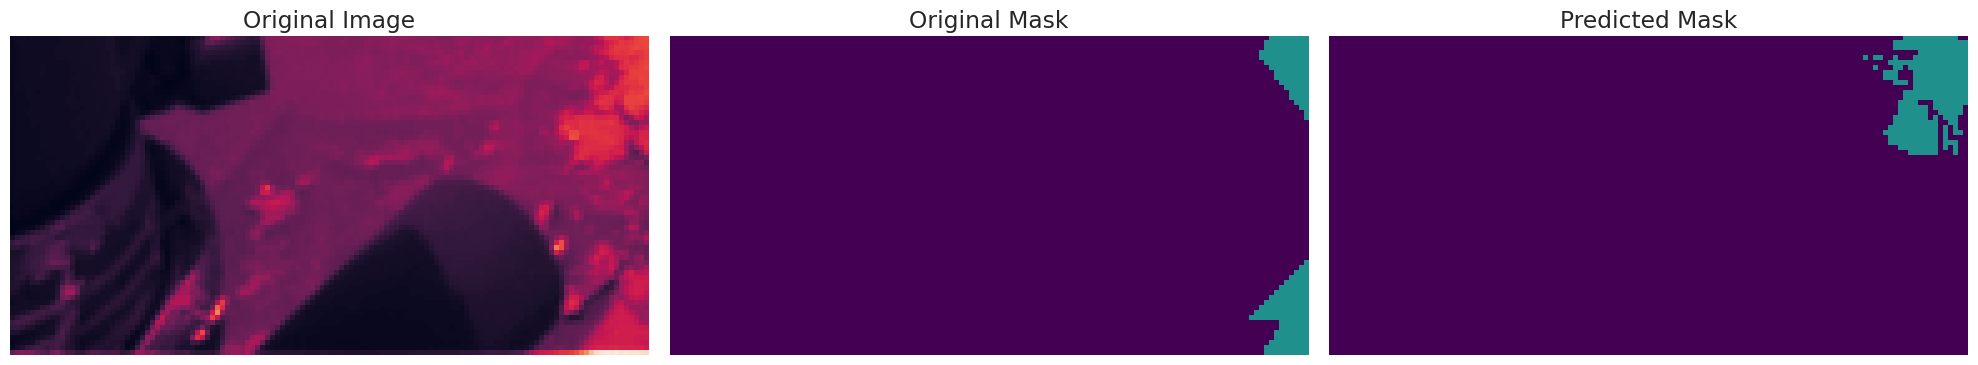

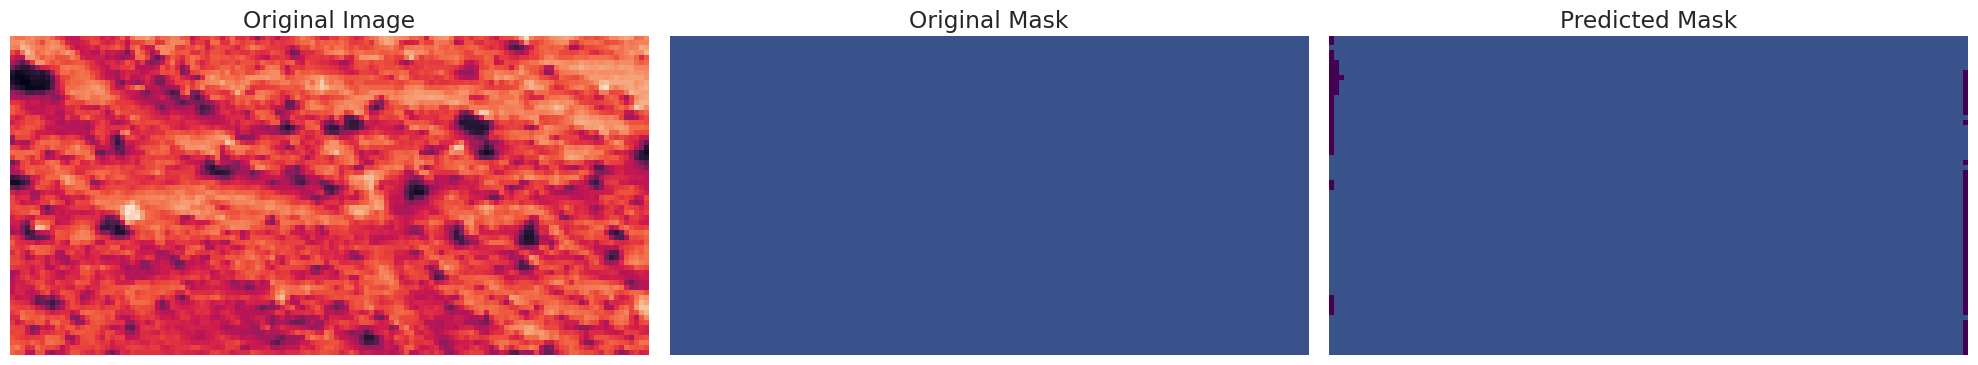

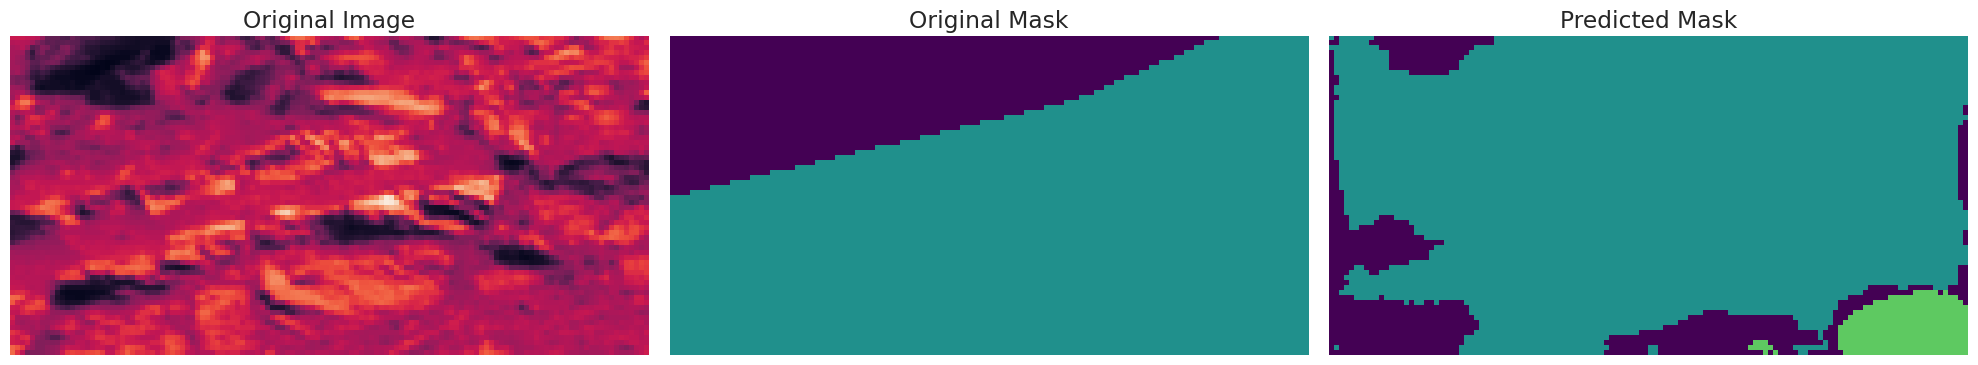

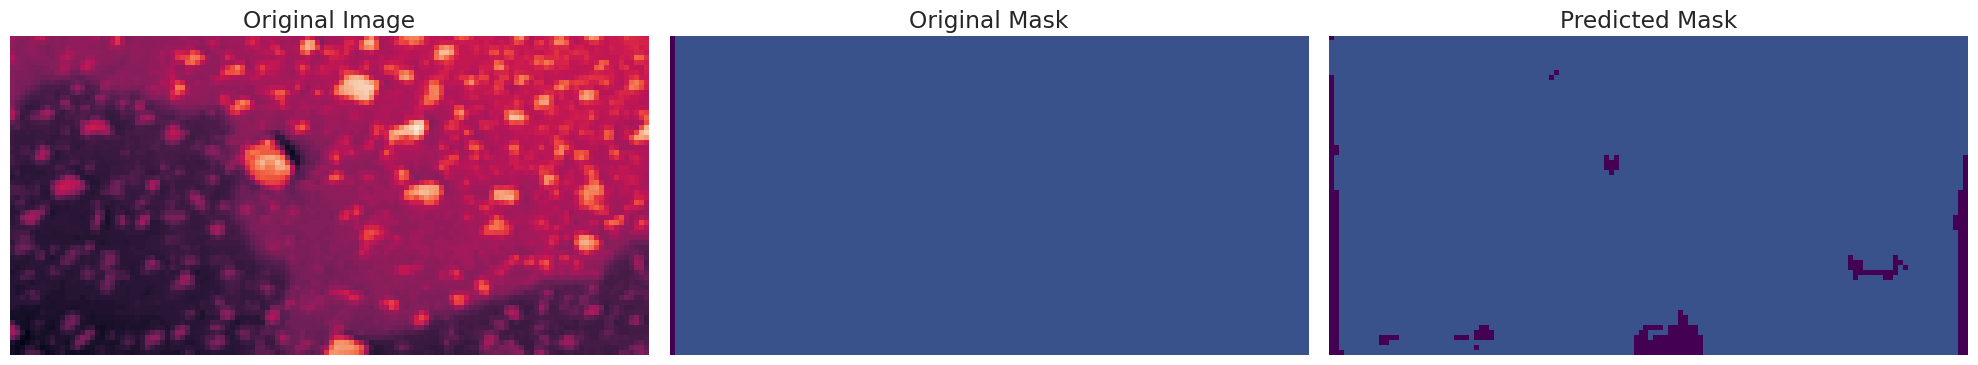

In [ ]:
def plot_triptychs(dataset, model, num_samples=1):
    """
    Plot triptychs (original image, true mask, predicted mask) for samples from a tf.data.Dataset

    Parameters:
    dataset: tf.data.Dataset - The dataset containing image-label pairs
    model: tf.keras.Model - The trained model to generate predictions
    num_samples: int - Number of samples to plot
    """
    # Take samples from the dataset
    samples = dataset.take(num_samples)

    for images, labels in samples:
        # If we have a batch, take the first example
        if len(images.shape) == 4:  # Batch of images
            images = images[0:1]
            labels = labels[0:1]

        # Generate predictions
        pred = model.predict(images, verbose=0)
        pred = tf.math.argmax(pred, axis=-1)

        # Create colormap based on number of classes in labels
        num_classes = 5 #ATTENTION ! Modification did here in place of the following 2 lines. TODO: double check
        # labels_np = labels.numpy()
        # num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        # Create figure with subplots
        fig, axes = plt.subplots(1, 3, figsize=(20, 4))

        # Plot original image
        axes[0].set_title("Original Image")
        axes[0].imshow(images[0])
        axes[0].axis('off')

        # Plot original mask
        axes[1].set_title("Original Mask")
        colored_label = apply_colormap(labels[0], colormap)
        axes[1].imshow(colored_label)
        axes[1].axis('off')

        # Plot predicted mask
        axes[2].set_title("Predicted Mask")
        colored_pred = apply_colormap(pred[0], colormap)
        axes[2].imshow(colored_pred)
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()
        plt.close()

# Example usage:
# Plot three random samples
plot_triptychs(test_dataset, model, num_samples=7)

In [ ]:
# Provide the correct path to the file
file_path = os.path.join('/content/drive/MyDrive/[2024-2025] AN2DL Homework 2', 'filtered_mars_for_students.npz')
data = np.load(file_path)
X_test = data["test_set"]
X_test = X_test / 255.0
X_test = np.expand_dims(X_test, axis=-1)  # Aggiungi un canale
print(f"X_test shape: {X_test.shape}")

# Predict in batches to avoid OOM errors
batch_size = 32 # Adjust batch size as needed based on your GPU memory
num_samples = X_test.shape[0]
preds = []

for i in range(0, num_samples, batch_size):
    batch_preds = model.predict(X_test[i:i + batch_size], verbose=0)
    preds.extend(np.argmax(batch_preds, axis=-1))

preds = np.array(preds) # Convert the list of predictions to a NumPy array
print(f"Predictions shape: {preds.shape}")

X_test shape: (10022, 64, 128, 1)


In [ ]:
# Plot 5 random images with labels
plot_random_images_with_labels(X_test, preds, num=5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(preds, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")


Above, we could calculate and visualize the distribution of predicted classes, providing insights into class frequencies, and print the number of unique predicted classes to assess the model's output diversity

##🗂️preparing the submission

In [ ]:
import pandas as pd

def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

print(f"Submission file saved to: {submission_filename}")
from google.colab import files
files.download(submission_filename)

Submission file saved to: submission_UNet_47.34.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>